In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Previous cell doesn't add this, so done manually
sys.path.append('C:\\Users\\bde2002.53381\\Desktop\\master-thesis')

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import random
from datetime import date
import datetime as DT
from datetime import datetime
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from collections import Counter
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold

from quality_evaluation.predictive_metrics import *

In [4]:
## Assuming that data is prepared:
# - target variable is added and last column
# - variables are added (age) and removed (dates, vital status)
# - categorical variables are encoded appropriatley (ordinal vs nominal)
# - missing values are handled appropriately
# - dummy columns to be dropped are specified outside of function or during preparation

In [5]:
# Load the original and validation dataframes
df_ori = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\df_ori_3_binned_p.csv") # This is the original data WITHOUT the holdout validation set
df_ori_val = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\df_val_3_binned_p.csv")

In [6]:
epsilon_names = ['10','1','0_1','0_01','0_001']
ms_privacy_levels = []
pb_privacy_levels = []

g = globals()

# The following cells lead to a list (e.g. syn_10) with all the versions of that privacy level, 
# and then to a list privacy_levels that contains all these sublists of the different privay levels with their versions

In [7]:
# Load ms dataframes for dataset 3
for epsilon in epsilon_names:
    syn_name = 'ms_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\ms\\ms_df_syn_3_e{}_v{}_p.csv".format(epsilon, versie))
        g[syn_name].append(df)
    ms_privacy_levels.append(g[syn_name])

In [8]:
# Load pb dataframes for dataset 3
for epsilon in epsilon_names:
    syn_name = 'pb_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\pb\\pb_df_syn_3_e{}_v{}_p.csv".format(epsilon, versie))
        g[syn_name].append(df)
    pb_privacy_levels.append(g[syn_name])

In [9]:
# Dropdummies and num_vars should be specified or can be left None if already taken care of during preperation
dropdummies = ['stage_2A', 'subloc_7', "diagnosis_age_71-90", "lymph_pos_0"]
num_vars = ['tum_differentiatiegraad_code', 'pat_geslacht_code']
models = [LogisticRegression(), DecisionTreeClassifier()]

In [10]:
LRscores, DTscores = FIDbenchmarking(models, df_ori, dropdummies=None, num_vars=num_vars)

fold 1
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
model LogisticRegression()
best parameters: LogisticRegression(C=10, max_iter=4000)
mean 0.7559964896566403
std 0.0077104707460597605
model DecisionTreeClassifier()
best parameters: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
mean 0.7189083602081408
std 0.006149631759122533
fold 2
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
model LogisticRegression(C=10, max_iter=4000)
best parameters: LogisticRegression(C=10, max_iter=4000)
mean 0.7506975363808682
std 0.00867104817732639
model DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
best parameters: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
mean 0.7113395908046194
std 0.008693493612818919
fold 3
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
model LogisticRegression(C=10, max_i

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
ori: LogisticRegression(C=1, max_iter=4000)
accuracy of original model is 0.7525734181047532
Feature: pat_geslacht_code Score: 0.11914
Feature: tum_differentiatiegraad_code Score: 0.09979
Feature: subloc_0 Score: 0.00761
Feature: subloc_2 Score: 0.03713
Feature: subloc_3 Score: 0.02073
Feature: subloc_4 Score: 0.01879
Feature: subloc_5 Score: 0.01680
Feature: subloc_6 Score: 0.00727
Feature: subloc_7 Score: 0.09399
Feature: subloc_8 Score: 0.01110
Feature: subloc_9 Score: 0.03376
Feature: stage_1 Score: 0.79550
Feature: stage_2 Score: 0.46909
Feature: stage_2A Score: 0.73205
Feature: stage_2B Score: 0.17046
Feature: stage_2C Score: 0.06639
Feature: stage_3 Score: 0.19980
Feature: stage_3A Score: 0.19796
Feature: stage_3B Score: 0.34043
Feature: stage_3C Score: 0.04847
Feature: stage_4 Score: 0.56547
Feature: stage_4A Score: 0.33246
Feature: stage_4B Score: 0.64325
Featu

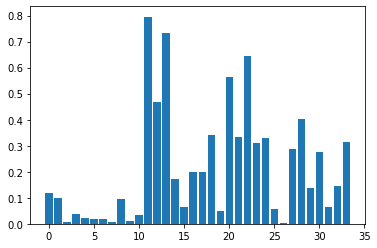

Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=0.0001, max_iter=4000)
Feature: pat_geslacht_code Score: 0.00281
Feature: tum_differentiatiegraad_code Score: 0.00015
Feature: subloc_0 Score: 0.00148
Feature: subloc_2 Score: 0.00135
Feature: subloc_3 Score: 0.00063
Feature: subloc_4 Score: 0.00010
Feature: subloc_5 Score: 0.00044
Feature: subloc_6 Score: 0.00091
Feature: subloc_7 Score: 0.00043
Feature: subloc_8 Score: 0.00006
Feature: subloc_9 Score: 0.00011
Feature: stage_1 Score: 0.00087
Feature: stage_2 Score: 0.00077
Feature: stage_2A Score: 0.00002
Feature: stage_2B Score: 0.00009
Feature: stage_2C Score: 0.00030
Feature: stage_3 Score: 0.00101
Feature: stage_3A Score: 0.00017
Feature: stage_3B Score: 0.00128
Feature: stage_3C Score: 0.00097
Feature: stage_4 Score: 0.00070
Feature: stage_4A Score: 0.00014
Feature: stage_4B Score: 0.00042
Feature: stage_4C Score: 0.00007
Feature: stage_M Score: 0.00005
Feature: stage_X Sco

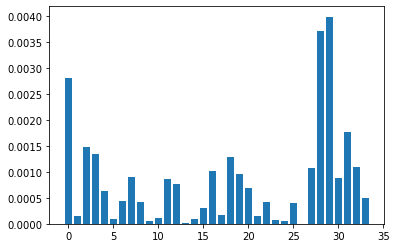

Attribute pat_geslacht_code has RMSE feature importance difference 0.013532181516173438
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009928283214223082
Attribute subloc_0 has RMSE feature importance difference 3.751722756687542e-05
Attribute subloc_2 has RMSE feature importance difference 0.001280013347985891
Attribute subloc_3 has RMSE feature importance difference 0.0004041933537251754
Attribute subloc_4 has RMSE feature importance difference 0.0003492975617044228
Attribute subloc_5 has RMSE feature importance difference 0.0002677876176910034
Attribute subloc_6 has RMSE feature importance difference 4.0419748174553555e-05
Attribute subloc_7 has RMSE feature importance difference 0.008753354307012105
Attribute subloc_8 has RMSE feature importance difference 0.00012197971026735954
Attribute subloc_9 has RMSE feature importance difference 0.0011317687249365496
Attribute stage_1 has RMSE feature importance difference 0.6314417592271165
Attribute stage_2

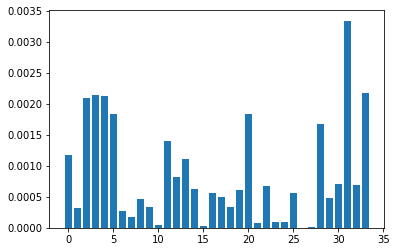

Attribute pat_geslacht_code has RMSE feature importance difference 0.013917711302743203
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009894532137242656
Attribute subloc_0 has RMSE feature importance difference 3.0339297575906637e-05
Attribute subloc_2 has RMSE feature importance difference 0.001224234005559269
Attribute subloc_3 has RMSE feature importance difference 0.00034594197057764094
Attribute subloc_4 has RMSE feature importance difference 0.00028758078774946116
Attribute subloc_5 has RMSE feature importance difference 0.00027317426503929335
Attribute subloc_6 has RMSE feature importance difference 5.031530441595561e-05
Attribute subloc_7 has RMSE feature importance difference 0.008746263932848981
Attribute subloc_8 has RMSE feature importance difference 0.00011601691977529008
Attribute subloc_9 has RMSE feature importance difference 0.001136084559330468
Attribute stage_1 has RMSE feature importance difference 0.6305911561260381
Attribute stage

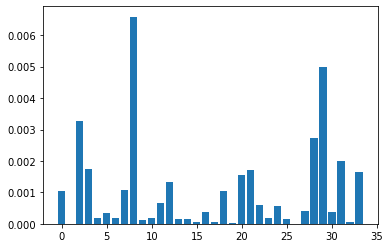

Attribute pat_geslacht_code has RMSE feature importance difference 0.013949803676528054
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009958171585160012
Attribute subloc_0 has RMSE feature importance difference 1.8886278084435967e-05
Attribute subloc_2 has RMSE feature importance difference 0.0012513038491627458
Attribute subloc_3 has RMSE feature importance difference 0.00042148080651244603
Attribute subloc_4 has RMSE feature importance difference 0.0003395919448855041
Attribute subloc_5 has RMSE feature importance difference 0.0002755643944960611
Attribute subloc_6 has RMSE feature importance difference 3.8352251016850583e-05
Attribute subloc_7 has RMSE feature importance difference 0.007638211031189713
Attribute subloc_8 has RMSE feature importance difference 0.00012036469813684085
Attribute subloc_9 has RMSE feature importance difference 0.0011265399100923285
Attribute stage_1 has RMSE feature importance difference 0.6317626676304092
Attribute stag

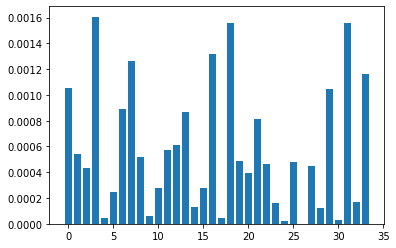

Attribute pat_geslacht_code has RMSE feature importance difference 0.013945325430585423
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009851045626893557
Attribute subloc_0 has RMSE feature importance difference 5.1484714780728045e-05
Attribute subloc_2 has RMSE feature importance difference 0.0012619113552333442
Attribute subloc_3 has RMSE feature importance difference 0.0004277451504857978
Attribute subloc_4 has RMSE feature importance difference 0.0003436466879265879
Attribute subloc_5 has RMSE feature importance difference 0.00025316207989274593
Attribute subloc_6 has RMSE feature importance difference 3.604331641328604e-05
Attribute subloc_7 has RMSE feature importance difference 0.00873644215664203
Attribute subloc_8 has RMSE feature importance difference 0.00012195897339838345
Attribute subloc_9 has RMSE feature importance difference 0.0011207540790241746
Attribute stage_1 has RMSE feature importance difference 0.6319077664078936
Attribute stage_

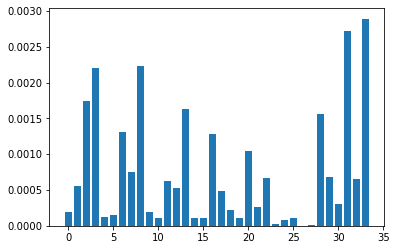

Attribute pat_geslacht_code has RMSE feature importance difference 0.01414992882812116
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009848785337349928
Attribute subloc_0 has RMSE feature importance difference 3.442059970684138e-05
Attribute subloc_2 has RMSE feature importance difference 0.001219769395263873
Attribute subloc_3 has RMSE feature importance difference 0.00042474109088075465
Attribute subloc_4 has RMSE feature importance difference 0.0003471586589946008
Attribute subloc_5 has RMSE feature importance difference 0.00024004197840188696
Attribute subloc_6 has RMSE feature importance difference 4.2466324028679224e-05
Attribute subloc_7 has RMSE feature importance difference 0.00841961964377071
Attribute subloc_8 has RMSE feature importance difference 0.00011912409806763545
Attribute subloc_9 has RMSE feature importance difference 0.0011324195499510614
Attribute stage_1 has RMSE feature importance difference 0.6318205845505959
Attribute stage_2

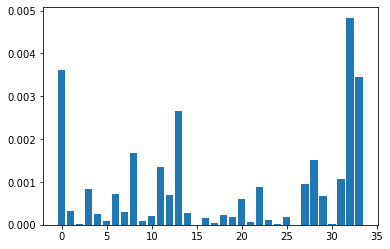

Attribute pat_geslacht_code has RMSE feature importance difference 0.013345259170584385
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00989293357637284
Attribute subloc_0 has RMSE feature importance difference 5.752468527672509e-05
Attribute subloc_2 has RMSE feature importance difference 0.0013167487325816125
Attribute subloc_3 has RMSE feature importance difference 0.00041895945149005335
Attribute subloc_4 has RMSE feature importance difference 0.0003492757843668571
Attribute subloc_5 has RMSE feature importance difference 0.00025829905219638185
Attribute subloc_6 has RMSE feature importance difference 4.861799032154767e-05
Attribute subloc_7 has RMSE feature importance difference 0.00852289610855982
Attribute subloc_8 has RMSE feature importance difference 0.00012132447620842639
Attribute subloc_9 has RMSE feature importance difference 0.0011250849887004196
Attribute stage_1 has RMSE feature importance difference 0.6306785833811318
Attribute stage_2

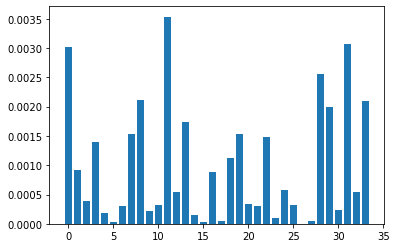

Attribute pat_geslacht_code has RMSE feature importance difference 0.013484800898355132
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009777044736451622
Attribute subloc_0 has RMSE feature importance difference 5.21529202123753e-05
Attribute subloc_2 has RMSE feature importance difference 0.0012771858438689293
Attribute subloc_3 has RMSE feature importance difference 0.0004220355885372532
Attribute subloc_4 has RMSE feature importance difference 0.00035173897794316236
Attribute subloc_5 has RMSE feature importance difference 0.0002723667615489892
Attribute subloc_6 has RMSE feature importance difference 3.2952752830454625e-05
Attribute subloc_7 has RMSE feature importance difference 0.008442119280584926
Attribute subloc_8 has RMSE feature importance difference 0.00011864589367580878
Attribute subloc_9 has RMSE feature importance difference 0.0011178778102197905
Attribute stage_1 has RMSE feature importance difference 0.6272084861162354
Attribute stage_

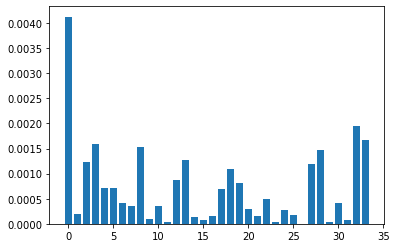

Attribute pat_geslacht_code has RMSE feature importance difference 0.01322871356037055
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009917985436072052
Attribute subloc_0 has RMSE feature importance difference 4.052616969024281e-05
Attribute subloc_2 has RMSE feature importance difference 0.0012636003348583012
Attribute subloc_3 has RMSE feature importance difference 0.0004007575666283648
Attribute subloc_4 has RMSE feature importance difference 0.0003267381043161358
Attribute subloc_5 has RMSE feature importance difference 0.0002686008131230239
Attribute subloc_6 has RMSE feature importance difference 4.787591157326299e-05
Attribute subloc_7 has RMSE feature importance difference 0.008547455457003698
Attribute subloc_8 has RMSE feature importance difference 0.0001211893912737311
Attribute subloc_9 has RMSE feature importance difference 0.0011151488372970857
Attribute stage_1 has RMSE feature importance difference 0.6327623225117556
Attribute stage_2 h

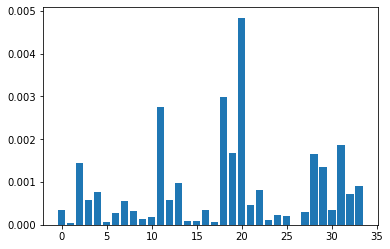

Attribute pat_geslacht_code has RMSE feature importance difference 0.014112296434937438
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009951495669018028
Attribute subloc_0 has RMSE feature importance difference 3.7827483575836217e-05
Attribute subloc_2 has RMSE feature importance difference 0.0013362383401087532
Attribute subloc_3 has RMSE feature importance difference 0.0003989166127449503
Attribute subloc_4 has RMSE feature importance difference 0.0003508360982804943
Attribute subloc_5 has RMSE feature importance difference 0.00027342228172440834
Attribute subloc_6 has RMSE feature importance difference 4.5105592424177595e-05
Attribute subloc_7 has RMSE feature importance difference 0.008773006065456699
Attribute subloc_8 has RMSE feature importance difference 0.00012023691148701872
Attribute subloc_9 has RMSE feature importance difference 0.0011267736852288502
Attribute stage_1 has RMSE feature importance difference 0.6284486283374187
Attribute stag

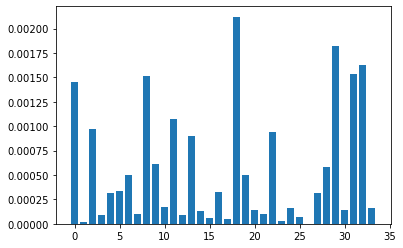

Attribute pat_geslacht_code has RMSE feature importance difference 0.013850301570576326
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009953845614982656
Attribute subloc_0 has RMSE feature importance difference 4.4023094008078606e-05
Attribute subloc_2 has RMSE feature importance difference 0.0013722552194992193
Attribute subloc_3 has RMSE feature importance difference 0.0004165824854998771
Attribute subloc_4 has RMSE feature importance difference 0.0003405562826938602
Attribute subloc_5 has RMSE feature importance difference 0.00026571862548601635
Attribute subloc_6 has RMSE feature importance difference 5.1395744407481605e-05
Attribute subloc_7 has RMSE feature importance difference 0.008551802373986143
Attribute subloc_8 has RMSE feature importance difference 0.00010998610761069282
Attribute subloc_9 has RMSE feature importance difference 0.0011276026877513918
Attribute stage_1 has RMSE feature importance difference 0.6311151441907545
Attribute stag

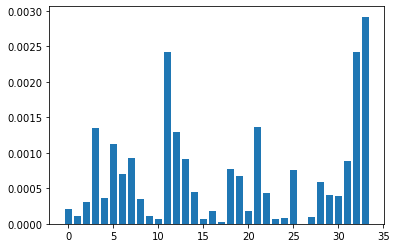

Attribute pat_geslacht_code has RMSE feature importance difference 0.014144333645874987
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009937261909329762
Attribute subloc_0 has RMSE feature importance difference 5.3253219472863846e-05
Attribute subloc_2 has RMSE feature importance difference 0.0012804767295299705
Attribute subloc_3 has RMSE feature importance difference 0.0004149412523643473
Attribute subloc_4 has RMSE feature importance difference 0.0003120682801539457
Attribute subloc_5 has RMSE feature importance difference 0.00025893374955937625
Attribute subloc_6 has RMSE feature importance difference 4.0161812341136866e-05
Attribute subloc_7 has RMSE feature importance difference 0.008768277034671236
Attribute subloc_8 has RMSE feature importance difference 0.00012073610154350229
Attribute subloc_9 has RMSE feature importance difference 0.0011346163122583851
Attribute stage_1 has RMSE feature importance difference 0.6289783598324663
Attribute stag

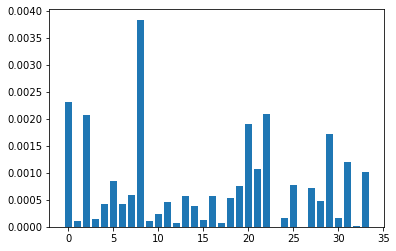

Attribute pat_geslacht_code has RMSE feature importance difference 0.013650675977353994
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00993539250411014
Attribute subloc_0 has RMSE feature importance difference 3.0673322224396324e-05
Attribute subloc_2 has RMSE feature importance difference 0.0013677183763267746
Attribute subloc_3 has RMSE feature importance difference 0.0004123397341395099
Attribute subloc_4 has RMSE feature importance difference 0.0003219294497418423
Attribute subloc_5 has RMSE feature importance difference 0.0002683230832303666
Attribute subloc_6 has RMSE feature importance difference 4.449272227028163e-05
Attribute subloc_7 has RMSE feature importance difference 0.008126546484182063
Attribute subloc_8 has RMSE feature importance difference 0.00012087162367082794
Attribute subloc_9 has RMSE feature importance difference 0.001123390625063588
Attribute stage_1 has RMSE feature importance difference 0.632077485628035
Attribute stage_2 h

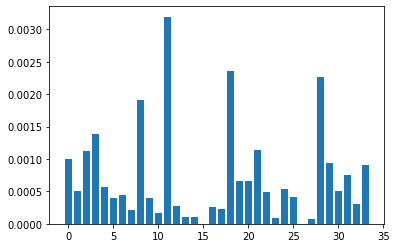

Attribute pat_geslacht_code has RMSE feature importance difference 0.013958190299771505
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009858367113196126
Attribute subloc_0 has RMSE feature importance difference 4.203346264583451e-05
Attribute subloc_2 has RMSE feature importance difference 0.0012779048699757274
Attribute subloc_3 has RMSE feature importance difference 0.00040627012421270655
Attribute subloc_4 has RMSE feature importance difference 0.00033790907599462575
Attribute subloc_5 has RMSE feature importance difference 0.00026764819281181924
Attribute subloc_6 has RMSE feature importance difference 4.985105877887235e-05
Attribute subloc_7 has RMSE feature importance difference 0.00847891362746995
Attribute subloc_8 has RMSE feature importance difference 0.00011457050465164316
Attribute subloc_9 has RMSE feature importance difference 0.0011279913100666415
Attribute stage_1 has RMSE feature importance difference 0.6277465913155128
Attribute stage

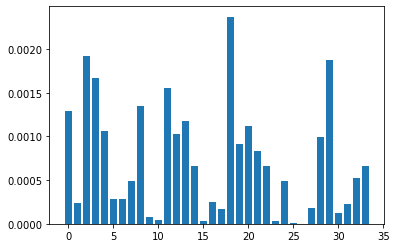

Attribute pat_geslacht_code has RMSE feature importance difference 0.013887327885180165
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00991169235978489
Attribute subloc_0 has RMSE feature importance difference 3.231572890130335e-05
Attribute subloc_2 has RMSE feature importance difference 0.001257733563272604
Attribute subloc_3 has RMSE feature importance difference 0.0003866302086823729
Attribute subloc_4 has RMSE feature importance difference 0.0003424558805843923
Attribute subloc_5 has RMSE feature importance difference 0.00027280967233412283
Attribute subloc_6 has RMSE feature importance difference 4.592653048985169e-05
Attribute subloc_7 has RMSE feature importance difference 0.008581207584186294
Attribute subloc_8 has RMSE feature importance difference 0.00012165933342524914
Attribute subloc_9 has RMSE feature importance difference 0.0011365374570586778
Attribute stage_1 has RMSE feature importance difference 0.6303403741585816
Attribute stage_2 

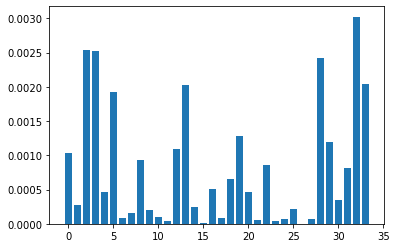

Attribute pat_geslacht_code has RMSE feature importance difference 0.013949902313313087
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00990439058810599
Attribute subloc_0 has RMSE feature importance difference 2.568818195218591e-05
Attribute subloc_2 has RMSE feature importance difference 0.0011974846200107
Attribute subloc_3 has RMSE feature importance difference 0.00041091045799758767
Attribute subloc_4 has RMSE feature importance difference 0.00028408899976063327
Attribute subloc_5 has RMSE feature importance difference 0.0002792694783434221
Attribute subloc_6 has RMSE feature importance difference 5.047018075321784e-05
Attribute subloc_7 has RMSE feature importance difference 0.008658881352279536
Attribute subloc_8 has RMSE feature importance difference 0.00011881782714211952
Attribute subloc_9 has RMSE feature importance difference 0.0011331405202719906
Attribute stage_1 has RMSE feature importance difference 0.6327617132039489
Attribute stage_2 h

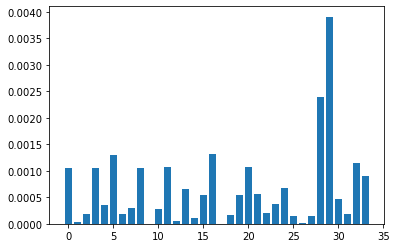

Attribute pat_geslacht_code has RMSE feature importance difference 0.013944142733638205
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009952108289653046
Attribute subloc_0 has RMSE feature importance difference 5.518496238890409e-05
Attribute subloc_2 has RMSE feature importance difference 0.0013016170237742364
Attribute subloc_3 has RMSE feature importance difference 0.00041485416459492963
Attribute subloc_4 has RMSE feature importance difference 0.0003057355615345054
Attribute subloc_5 has RMSE feature importance difference 0.00027619909773310213
Attribute subloc_6 has RMSE feature importance difference 4.862433840008913e-05
Attribute subloc_7 has RMSE feature importance difference 0.008635103031026327
Attribute subloc_8 has RMSE feature importance difference 0.00012331533584150126
Attribute subloc_9 has RMSE feature importance difference 0.0011210950089451332
Attribute stage_1 has RMSE feature importance difference 0.6311254084516982
Attribute stage

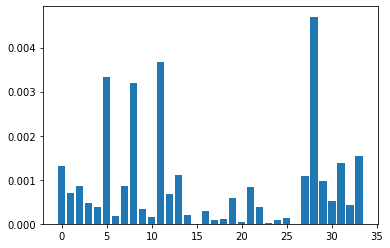

Attribute pat_geslacht_code has RMSE feature importance difference 0.01388579802006335
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00981946609220995
Attribute subloc_0 has RMSE feature importance difference 4.53964563179707e-05
Attribute subloc_2 has RMSE feature importance difference 0.0013431414466039127
Attribute subloc_3 has RMSE feature importance difference 0.00041403328297064194
Attribute subloc_4 has RMSE feature importance difference 0.00023889106529757865
Attribute subloc_5 has RMSE feature importance difference 0.0002761563176210515
Attribute subloc_6 has RMSE feature importance difference 4.120694492940216e-05
Attribute subloc_7 has RMSE feature importance difference 0.008243389387132937
Attribute subloc_8 has RMSE feature importance difference 0.00011591862376618531
Attribute subloc_9 has RMSE feature importance difference 0.0011294792520264458
Attribute stage_1 has RMSE feature importance difference 0.6269858216486308
Attribute stage_2 

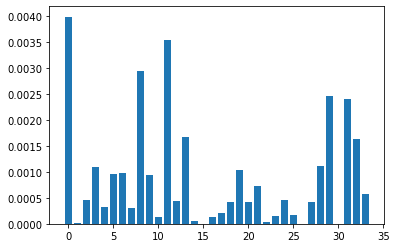

Attribute pat_geslacht_code has RMSE feature importance difference 0.013260654215905167
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009953610840225502
Attribute subloc_0 has RMSE feature importance difference 5.100603536291359e-05
Attribute subloc_2 has RMSE feature importance difference 0.0012983662216890569
Attribute subloc_3 has RMSE feature importance difference 0.0004162140774781524
Attribute subloc_4 has RMSE feature importance difference 0.00031800916876192534
Attribute subloc_5 has RMSE feature importance difference 0.00025012301614879697
Attribute subloc_6 has RMSE feature importance difference 4.843562585999935e-05
Attribute subloc_7 has RMSE feature importance difference 0.00828848837311324
Attribute subloc_8 has RMSE feature importance difference 0.000103202959187731
Attribute subloc_9 has RMSE feature importance difference 0.0011312489500569728
Attribute stage_1 has RMSE feature importance difference 0.627213815135045
Attribute stage_2 h

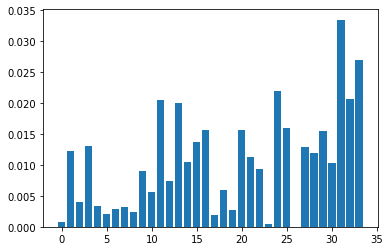

Attribute pat_geslacht_code has RMSE feature importance difference 0.013991658982761555
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007674392818464565
Attribute subloc_0 has RMSE feature importance difference 1.3235813341953684e-05
Attribute subloc_2 has RMSE feature importance difference 0.0005793686458516811
Attribute subloc_3 has RMSE feature importance difference 0.0003011880439481309
Attribute subloc_4 has RMSE feature importance difference 0.0002770497586429283
Attribute subloc_5 has RMSE feature importance difference 0.00019591232737207592
Attribute subloc_6 has RMSE feature importance difference 1.6952322843888507e-05
Attribute subloc_7 has RMSE feature importance difference 0.008403164957530617
Attribute subloc_8 has RMSE feature importance difference 4.421046410923788e-06
Attribute subloc_9 has RMSE feature importance difference 0.000790432485271401
Attribute stage_1 has RMSE feature importance difference 0.6005990149559632
Attribute stage_

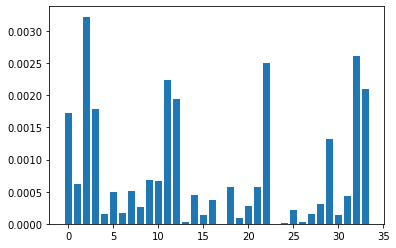

Attribute pat_geslacht_code has RMSE feature importance difference 0.013786344547526369
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009835985449445
Attribute subloc_0 has RMSE feature importance difference 1.920499082482914e-05
Attribute subloc_2 has RMSE feature importance difference 0.0012487774318921602
Attribute subloc_3 has RMSE feature importance difference 0.00042354600176351323
Attribute subloc_4 has RMSE feature importance difference 0.00033450027575760956
Attribute subloc_5 has RMSE feature importance difference 0.00027646716477762386
Attribute subloc_6 has RMSE feature importance difference 4.570797447883601e-05
Attribute subloc_7 has RMSE feature importance difference 0.008784783091952008
Attribute subloc_8 has RMSE feature importance difference 0.00010849801768604332
Attribute subloc_9 has RMSE feature importance difference 0.0010952325665562453
Attribute stage_1 has RMSE feature importance difference 0.6292602612716602
Attribute stage_2

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

Only one class left in synthetic dataset, no Logistic Regression possible. Coefficients are set to 0
Attribute pat_geslacht_code has RMSE feature importance difference 0.014194684101714558
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009958316748434786
Attribute subloc_0 has RMSE feature importance difference 5.7846136751590244e-05
Attribute subloc_2 has RMSE feature importance difference 0.0013786564197247116
Attribute subloc_3 has RMSE feature importance difference 0.00042974709513079627
Attribute subloc_4 has RMSE feature importance difference 0.0003529643627312949
Attribute subloc_5 has RMSE feature importance difference 0.00028222623100233104
Attribute subloc_6 has RMSE feature importance difference 5.2807319698829914e-05
Attribute subloc_7 has RMSE feature importance difference 0.008833339606037412
Attribute subloc_8 has RMSE feature importance difference 0.00012331533584150126
Attribute subloc_9 has RMSE feature importance difference 0.00113946

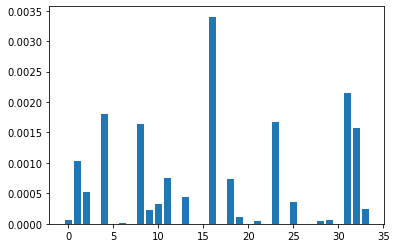

Attribute pat_geslacht_code has RMSE feature importance difference 0.014181205565975316
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009755022030951887
Attribute subloc_0 has RMSE feature importance difference 5.015380570725639e-05
Attribute subloc_2 has RMSE feature importance difference 0.0013786564197247116
Attribute subloc_3 has RMSE feature importance difference 0.000357948231679642
Attribute subloc_4 has RMSE feature importance difference 0.0003529643627312949
Attribute subloc_5 has RMSE feature importance difference 0.00028187327870657705
Attribute subloc_6 has RMSE feature importance difference 5.2807319698829914e-05
Attribute subloc_7 has RMSE feature importance difference 0.008527838662242925
Attribute subloc_8 has RMSE feature importance difference 0.00011846120542001722
Attribute subloc_9 has RMSE feature importance difference 0.001117303441902469
Attribute stage_1 has RMSE feature importance difference 0.6316199388884564
Attribute stage_2

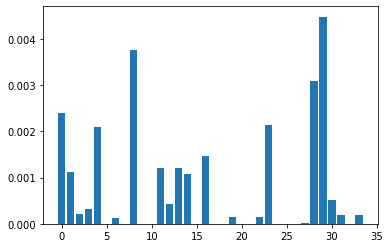

Attribute pat_geslacht_code has RMSE feature importance difference 0.013627999717672507
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009736438524379463
Attribute subloc_0 has RMSE feature importance difference 5.4571123089900844e-05
Attribute subloc_2 has RMSE feature importance difference 0.0013548211365872868
Attribute subloc_3 has RMSE feature importance difference 0.0003470535263459208
Attribute subloc_4 has RMSE feature importance difference 0.0003529643627312949
Attribute subloc_5 has RMSE feature importance difference 0.00027806722709268467
Attribute subloc_6 has RMSE feature importance difference 5.2807319698829914e-05
Attribute subloc_7 has RMSE feature importance difference 0.008140466958749622
Attribute subloc_8 has RMSE feature importance difference 0.00012331533584150126
Attribute subloc_9 has RMSE feature importance difference 0.001139460405289564
Attribute stage_1 has RMSE feature importance difference 0.6308902638612462
Attribute stage

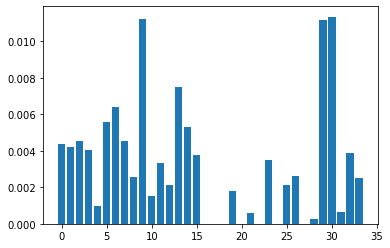

Attribute pat_geslacht_code has RMSE feature importance difference 0.013168346648404527
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00913676318163877
Attribute subloc_0 has RMSE feature importance difference 9.332679096100474e-06
Attribute subloc_2 has RMSE feature importance difference 0.0010938805289476678
Attribute subloc_3 has RMSE feature importance difference 0.0003891844952992407
Attribute subloc_4 has RMSE feature importance difference 0.0001747132365201399
Attribute subloc_5 has RMSE feature importance difference 0.00010777462745527903
Attribute subloc_6 has RMSE feature importance difference 7.419385231758117e-06
Attribute subloc_7 has RMSE feature importance difference 0.008359209840665505
Attribute subloc_8 has RMSE feature importance difference 1.5455028953575763e-08
Attribute subloc_9 has RMSE feature importance difference 0.0010390498404721853
Attribute stage_1 has RMSE feature importance difference 0.6275577553080084
Attribute stage_2

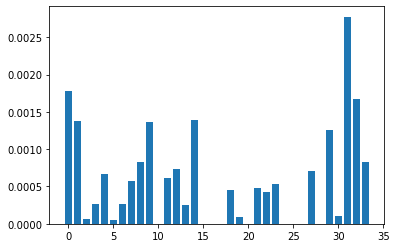

Attribute pat_geslacht_code has RMSE feature importance difference 0.013772358808575
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00968648068214401
Attribute subloc_0 has RMSE feature importance difference 5.695017921930687e-05
Attribute subloc_2 has RMSE feature importance difference 0.0013594249580832429
Attribute subloc_3 has RMSE feature importance difference 0.000402609423386444
Attribute subloc_4 has RMSE feature importance difference 0.00035084091555455073
Attribute subloc_5 has RMSE feature importance difference 0.0002735382709355238
Attribute subloc_6 has RMSE feature importance difference 4.4829361366525035e-05
Attribute subloc_7 has RMSE feature importance difference 0.00867843146156083
Attribute subloc_8 has RMSE feature importance difference 9.501548807596933e-05
Attribute subloc_9 has RMSE feature importance difference 0.001139460405289564
Attribute stage_1 has RMSE feature importance difference 0.6318454788357526
Attribute stage_2 has R

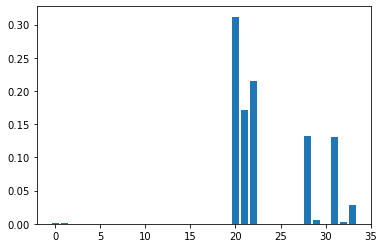

syn: DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=0.005)
Feature: pat_geslacht_code Score: 0.00000
Feature: tum_differentiatiegraad_code Score: 0.00000
Feature: subloc_0 Score: 0.00000
Feature: subloc_2 Score: 0.00000
Feature: subloc_3 Score: 0.00000
Feature: subloc_4 Score: 0.00000
Feature: subloc_5 Score: 0.00000
Feature: subloc_6 Score: 0.00000
Feature: subloc_7 Score: 0.00000
Feature: subloc_8 Score: 0.00000
Feature: subloc_9 Score: 0.00000
Feature: stage_1 Score: 0.00000
Feature: stage_2 Score: 0.00000
Feature: stage_2A Score: 0.00000
Feature: stage_2B Score: 0.00000
Feature: stage_2C Score: 0.00000
Feature: stage_3 Score: 0.00000
Feature: stage_3A Score: 0.00000
Feature: stage_3B Score: 0.00000
Feature: stage_3C Score: 0.00000
Feature: stage_4 Score: 0.00000
Feature: stage_4A Score: 0.00000
Feature: stage_4B Score: 0.00000
Feature: stage_4C Score: 0.00000
Feature: stage_M Score: 0.00000
Feature: stage_X Score: 0.00000
Feature: diagnosis_age_0-20 Score

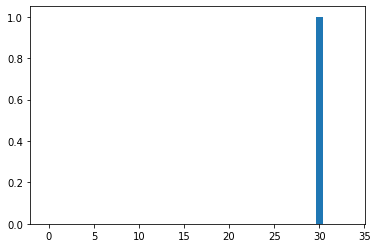

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

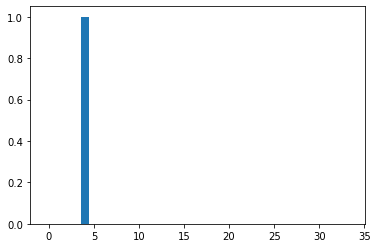

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 1.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

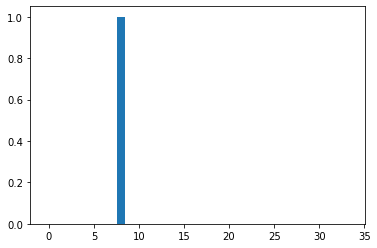

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.9995165344391704
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature

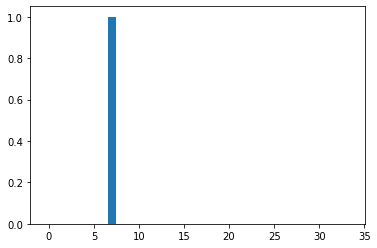

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 1.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

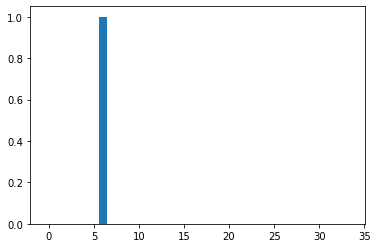

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 1.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

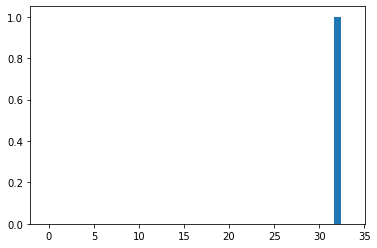

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

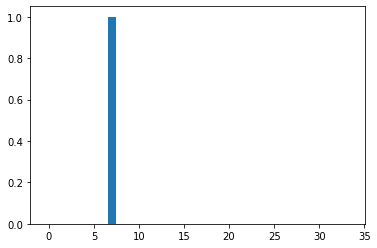

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 1.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

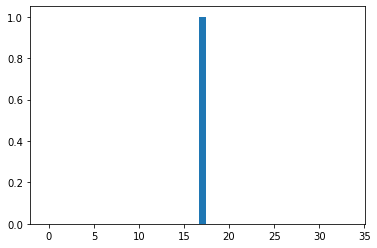

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

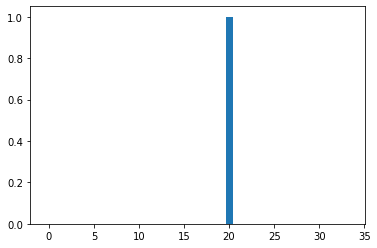

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

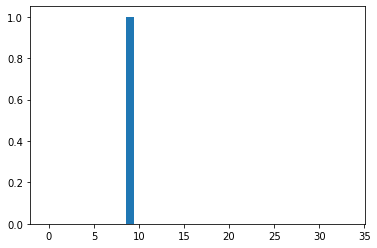

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 1.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

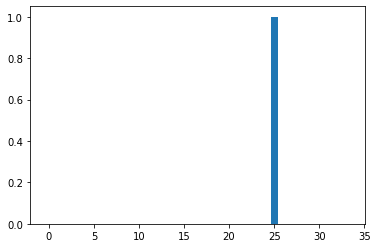

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

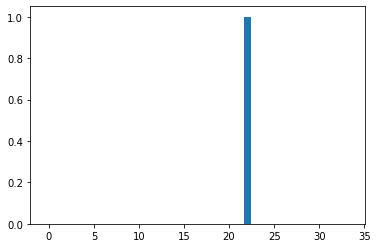

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

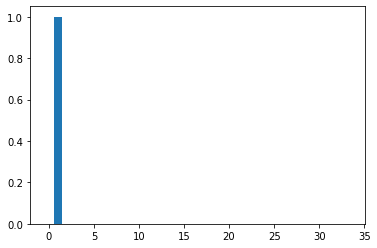

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.9986164960859263
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature

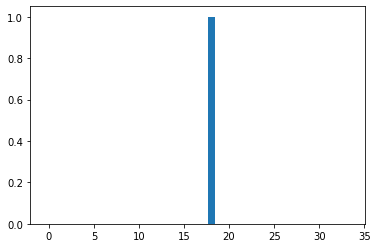

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

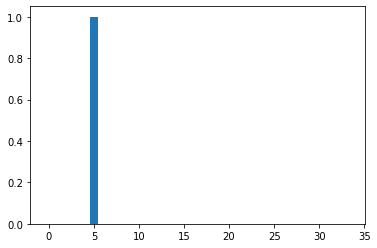

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 1.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

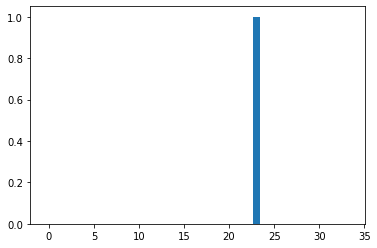

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

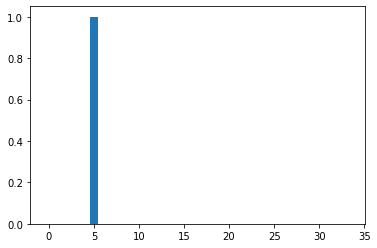

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 1.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

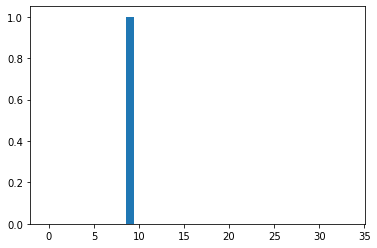

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 1.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

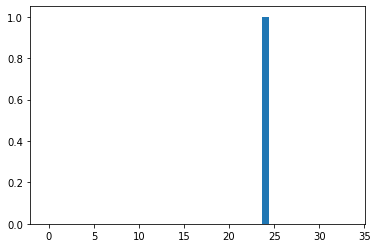

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

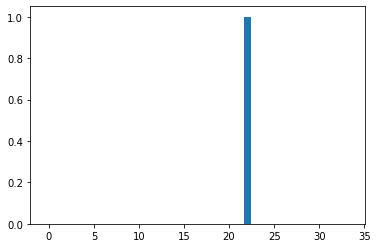

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

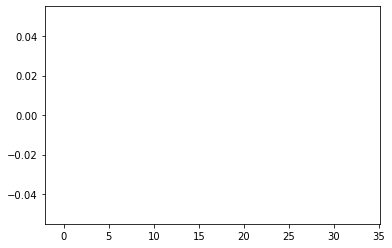

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

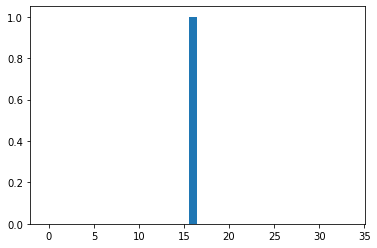

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

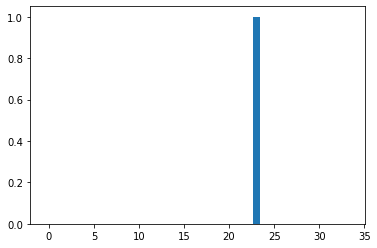

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

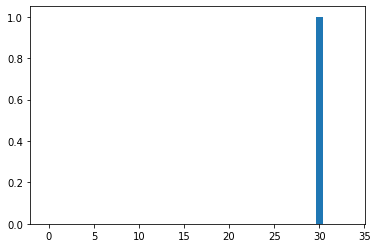

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

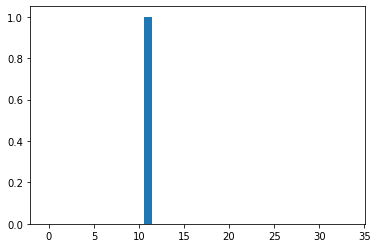

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 1.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

In [11]:
# Do for one DP algorithm at a time
privacy_levels = ms_privacy_levels

ms_FID_ORI, ms_FID, ms_FID_ERRORS = FIDmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
ori: LogisticRegression(C=1, max_iter=4000)
accuracy of original model is 0.7525734181047532
Feature: pat_geslacht_code Score: 0.11914
Feature: tum_differentiatiegraad_code Score: 0.09979
Feature: subloc_0 Score: 0.00761
Feature: subloc_2 Score: 0.03713
Feature: subloc_3 Score: 0.02073
Feature: subloc_4 Score: 0.01879
Feature: subloc_5 Score: 0.01680
Feature: subloc_6 Score: 0.00727
Feature: subloc_7 Score: 0.09399
Feature: subloc_8 Score: 0.01110
Feature: subloc_9 Score: 0.03376
Feature: stage_1 Score: 0.79550
Feature: stage_2 Score: 0.46909
Feature: stage_2A Score: 0.73205
Feature: stage_2B Score: 0.17046
Feature: stage_2C Score: 0.06639
Feature: stage_3 Score: 0.19980
Feature: stage_3A Score: 0.19796
Feature: stage_3B Score: 0.34043
Feature: stage_3C Score: 0.04847
Feature: stage_4 Score: 0.56547
Feature: stage_4A Score: 0.33246
Feature: stage_4B Score: 0.64325
Featu

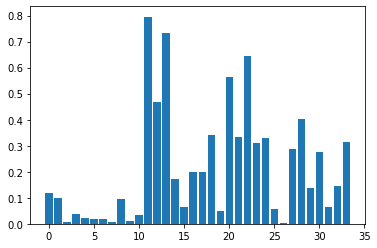

Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=1, max_iter=4000)
Feature: pat_geslacht_code Score: 0.09708
Feature: tum_differentiatiegraad_code Score: 0.05057
Feature: subloc_0 Score: 0.04162
Feature: subloc_2 Score: 0.00756
Feature: subloc_3 Score: 0.02332
Feature: subloc_4 Score: 0.03775
Feature: subloc_5 Score: 0.01237
Feature: subloc_6 Score: 0.01841
Feature: subloc_7 Score: 0.04473
Feature: subloc_8 Score: 0.01905
Feature: subloc_9 Score: 0.00581
Feature: stage_1 Score: 0.54181
Feature: stage_2 Score: 0.27839
Feature: stage_2A Score: 0.44806
Feature: stage_2B Score: 0.06952
Feature: stage_2C Score: 0.03334
Feature: stage_3 Score: 0.09593
Feature: stage_3A Score: 0.14540
Feature: stage_3B Score: 0.19896
Feature: stage_3C Score: 0.01948
Feature: stage_4 Score: 0.60373
Feature: stage_4A Score: 0.34241
Feature: stage_4B Score: 0.49258
Feature: stage_4C Score: 0.03510
Feature: stage_M Score: 0.14114
Feature: stage_X Score: 0

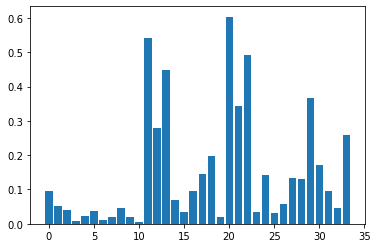

Attribute pat_geslacht_code has RMSE feature importance difference 0.0004868443790708889
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0024231620353663483
Attribute subloc_0 has RMSE feature importance difference 0.0011566455268546992
Attribute subloc_2 has RMSE feature importance difference 0.0008742540948664855
Attribute subloc_3 has RMSE feature importance difference 6.727599666375885e-06
Attribute subloc_4 has RMSE feature importance difference 0.00035955750890362273
Attribute subloc_5 has RMSE feature importance difference 1.9650575965503728e-05
Attribute subloc_6 has RMSE feature importance difference 0.00012421173537459395
Attribute subloc_7 has RMSE feature importance difference 0.0024262893171978907
Attribute subloc_8 has RMSE feature importance difference 6.30988236704961e-05
Attribute subloc_9 has RMSE feature importance difference 0.0007810529335444892
Attribute stage_1 has RMSE feature importance difference 0.06435903827538872
Attribute st

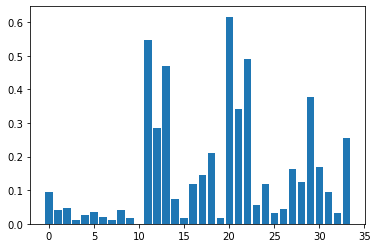

Attribute pat_geslacht_code has RMSE feature importance difference 0.0005795100630330487
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.003472332420943845
Attribute subloc_0 has RMSE feature importance difference 0.0016394330176636416
Attribute subloc_2 has RMSE feature importance difference 0.0006981895896639391
Attribute subloc_3 has RMSE feature importance difference 3.366177857995535e-05
Attribute subloc_4 has RMSE feature importance difference 0.0002535470670712371
Attribute subloc_5 has RMSE feature importance difference 7.4766757874801485e-06
Attribute subloc_6 has RMSE feature importance difference 2.8183372922885793e-05
Attribute subloc_7 has RMSE feature importance difference 0.002673341918619328
Attribute subloc_8 has RMSE feature importance difference 3.3404189681212605e-05
Attribute subloc_9 has RMSE feature importance difference 0.0011339191255708959
Attribute stage_1 has RMSE feature importance difference 0.061896013366727905
Attribute st

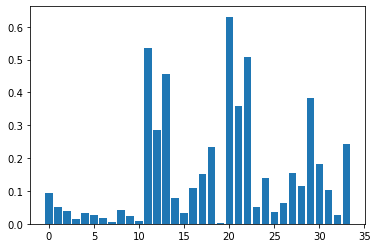

Attribute pat_geslacht_code has RMSE feature importance difference 0.0007047262999111632
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0024548545184224168
Attribute subloc_0 has RMSE feature importance difference 0.0010726851212746519
Attribute subloc_2 has RMSE feature importance difference 0.00045741411556341025
Attribute subloc_3 has RMSE feature importance difference 0.00014980535808443285
Attribute subloc_4 has RMSE feature importance difference 8.067940867816714e-05
Attribute subloc_5 has RMSE feature importance difference 1.8212613657199994e-06
Attribute subloc_6 has RMSE feature importance difference 1.0810462944356207e-06
Attribute subloc_7 has RMSE feature importance difference 0.00278582034756306
Attribute subloc_8 has RMSE feature importance difference 0.0001758693327687363
Attribute subloc_9 has RMSE feature importance difference 0.0006078853096997057
Attribute stage_1 has RMSE feature importance difference 0.06751768923710619
Attribute st

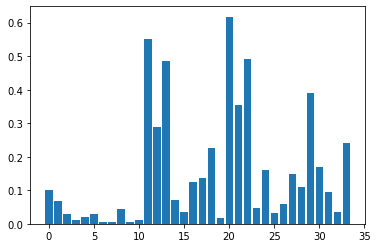

Attribute pat_geslacht_code has RMSE feature importance difference 0.0003001390519750334
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.001032339430981091
Attribute subloc_0 has RMSE feature importance difference 0.000517029159846885
Attribute subloc_2 has RMSE feature importance difference 0.0006879017871102455
Attribute subloc_3 has RMSE feature importance difference 8.123603384101095e-07
Attribute subloc_4 has RMSE feature importance difference 0.00011156503311314486
Attribute subloc_5 has RMSE feature importance difference 0.00011263143245883003
Attribute subloc_6 has RMSE feature importance difference 1.0061861858153388e-06
Attribute subloc_7 has RMSE feature importance difference 0.0026331940170736517
Attribute subloc_8 has RMSE feature importance difference 2.2066781005089104e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004953436001981488
Attribute stage_1 has RMSE feature importance difference 0.05981031254918553
Attribute st

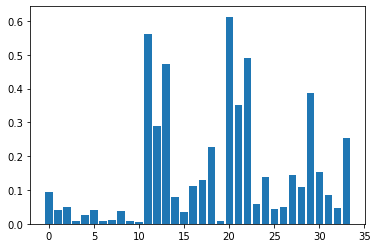

Attribute pat_geslacht_code has RMSE feature importance difference 0.0007043642568765934
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0035819724580971857
Attribute subloc_0 has RMSE feature importance difference 0.0018395044377490664
Attribute subloc_2 has RMSE feature importance difference 0.0008354616348679811
Attribute subloc_3 has RMSE feature importance difference 1.790156332317791e-05
Attribute subloc_4 has RMSE feature importance difference 0.0004688559018850761
Attribute subloc_5 has RMSE feature importance difference 7.86336066861644e-05
Attribute subloc_6 has RMSE feature importance difference 1.8360939161694245e-05
Attribute subloc_7 has RMSE feature importance difference 0.003279035651661354
Attribute subloc_8 has RMSE feature importance difference 2.494386571550364e-06
Attribute subloc_9 has RMSE feature importance difference 0.0008647695467491976
Attribute stage_1 has RMSE feature importance difference 0.054377568435627625
Attribute stag

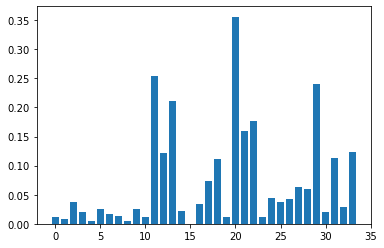

Attribute pat_geslacht_code has RMSE feature importance difference 0.011602791140371656
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0083639602841722
Attribute subloc_0 has RMSE feature importance difference 0.000915082115701861
Attribute subloc_2 has RMSE feature importance difference 0.000256899697029952
Attribute subloc_3 has RMSE feature importance difference 0.00024858127853926104
Attribute subloc_4 has RMSE feature importance difference 5.096086318530403e-05
Attribute subloc_5 has RMSE feature importance difference 9.146627547454569e-10
Attribute subloc_6 has RMSE feature importance difference 3.84574807193649e-05
Attribute subloc_7 has RMSE feature importance difference 0.008089990702764303
Attribute subloc_8 has RMSE feature importance difference 0.00020040236580392607
Attribute subloc_9 has RMSE feature importance difference 0.0004917455949484001
Attribute stage_1 has RMSE feature importance difference 0.2934872024863548
Attribute stage_2 has

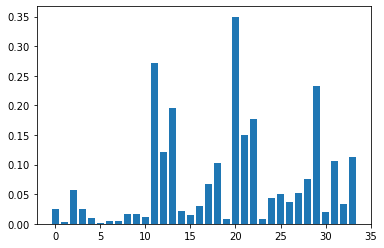

Attribute pat_geslacht_code has RMSE feature importance difference 0.008862477488980268
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00920865102397731
Attribute subloc_0 has RMSE feature importance difference 0.0024168701566282987
Attribute subloc_2 has RMSE feature importance difference 0.00015786851308079272
Attribute subloc_3 has RMSE feature importance difference 0.00012380137568160861
Attribute subloc_4 has RMSE feature importance difference 0.00028041697436012207
Attribute subloc_5 has RMSE feature importance difference 0.0001417049987375337
Attribute subloc_6 has RMSE feature importance difference 4.813606766501954e-06
Attribute subloc_7 has RMSE feature importance difference 0.006007461531023416
Attribute subloc_8 has RMSE feature importance difference 2.255498853134051e-05
Attribute subloc_9 has RMSE feature importance difference 0.0005004884429135993
Attribute stage_1 has RMSE feature importance difference 0.27516556289380595
Attribute stage

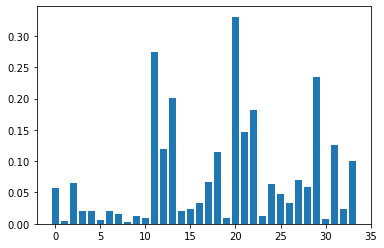

Attribute pat_geslacht_code has RMSE feature importance difference 0.0038622345189135454
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009198654875737334
Attribute subloc_0 has RMSE feature importance difference 0.0032428580417336417
Attribute subloc_2 has RMSE feature importance difference 0.00027032318993277317
Attribute subloc_3 has RMSE feature importance difference 1.955060869258422e-07
Attribute subloc_4 has RMSE feature importance difference 0.00016463353820356228
Attribute subloc_5 has RMSE feature importance difference 1.1712693328179844e-05
Attribute subloc_6 has RMSE feature importance difference 6.341020042629685e-05
Attribute subloc_7 has RMSE feature importance difference 0.00831680133143743
Attribute subloc_8 has RMSE feature importance difference 8.894958659049173e-07
Attribute subloc_9 has RMSE feature importance difference 0.0005790568256591439
Attribute stage_1 has RMSE feature importance difference 0.270974281244243
Attribute stage_

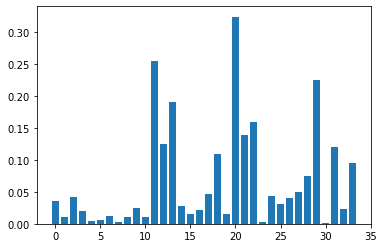

Attribute pat_geslacht_code has RMSE feature importance difference 0.0069478996723175614
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007969671103605882
Attribute subloc_0 has RMSE feature importance difference 0.0012340408328694395
Attribute subloc_2 has RMSE feature importance difference 0.0002957386972340063
Attribute subloc_3 has RMSE feature importance difference 0.00028631559057726747
Attribute subloc_4 has RMSE feature importance difference 0.00017726489701491572
Attribute subloc_5 has RMSE feature importance difference 2.2080353116450223e-05
Attribute subloc_6 has RMSE feature importance difference 2.1071948203645046e-05
Attribute subloc_7 has RMSE feature importance difference 0.006920314296407445
Attribute subloc_8 has RMSE feature importance difference 0.0002011363493257798
Attribute subloc_9 has RMSE feature importance difference 0.0005082162202407216
Attribute stage_1 has RMSE feature importance difference 0.2921617779297249
Attribute sta

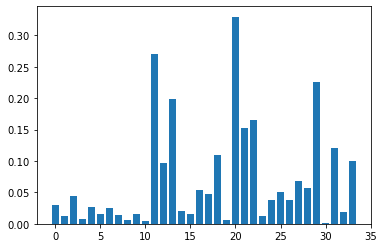

Attribute pat_geslacht_code has RMSE feature importance difference 0.007933647311874821
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007569205623671637
Attribute subloc_0 has RMSE feature importance difference 0.0013506699111231375
Attribute subloc_2 has RMSE feature importance difference 0.0008634806356087654
Attribute subloc_3 has RMSE feature importance difference 3.023444428105867e-05
Attribute subloc_4 has RMSE feature importance difference 6.777126018384345e-06
Attribute subloc_5 has RMSE feature importance difference 7.760298736521944e-05
Attribute subloc_6 has RMSE feature importance difference 4.528345529994737e-05
Attribute subloc_7 has RMSE feature importance difference 0.007747478452846012
Attribute subloc_8 has RMSE feature importance difference 2.7828640559623666e-05
Attribute subloc_9 has RMSE feature importance difference 0.0008974619970089733
Attribute stage_1 has RMSE feature importance difference 0.2757493708855972
Attribute stage_2

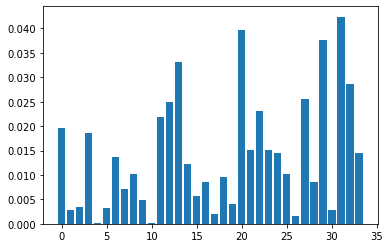

Attribute pat_geslacht_code has RMSE feature importance difference 0.00989586510149591
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009416864202463118
Attribute subloc_0 has RMSE feature importance difference 1.757309008484574e-05
Attribute subloc_2 has RMSE feature importance difference 0.0003400441999028727
Attribute subloc_3 has RMSE feature importance difference 0.00042518977957090585
Attribute subloc_4 has RMSE feature importance difference 0.0002445457397084608
Attribute subloc_5 has RMSE feature importance difference 9.703201546748261e-06
Attribute subloc_6 has RMSE feature importance difference 4.367025021666942e-09
Attribute subloc_7 has RMSE feature importance difference 0.0070319030240470395
Attribute subloc_8 has RMSE feature importance difference 3.8636369986119406e-05
Attribute subloc_9 has RMSE feature importance difference 0.0011307019154799646
Attribute stage_1 has RMSE feature importance difference 0.5985430339831069
Attribute stage_

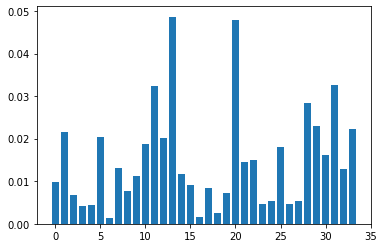

Attribute pat_geslacht_code has RMSE feature importance difference 0.011949765441687596
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.006136323537299521
Attribute subloc_0 has RMSE feature importance difference 7.817465794268898e-07
Attribute subloc_2 has RMSE feature importance difference 0.0010864634789893234
Attribute subloc_3 has RMSE feature importance difference 0.00026857761967864606
Attribute subloc_4 has RMSE feature importance difference 2.7184135236719188e-06
Attribute subloc_5 has RMSE feature importance difference 0.00023977725080584142
Attribute subloc_6 has RMSE feature importance difference 3.340659273759728e-05
Attribute subloc_7 has RMSE feature importance difference 0.007436193616735891
Attribute subloc_8 has RMSE feature importance difference 4.3932115999479344e-09
Attribute subloc_9 has RMSE feature importance difference 0.0002235637075462932
Attribute stage_1 has RMSE feature importance difference 0.5824805056188677
Attribute stag

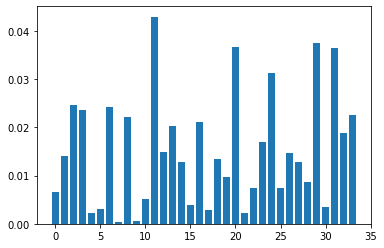

Attribute pat_geslacht_code has RMSE feature importance difference 0.012675679273256942
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007331793562474675
Attribute subloc_0 has RMSE feature importance difference 0.00029418040146456174
Attribute subloc_2 has RMSE feature importance difference 0.00018134157008964637
Attribute subloc_3 has RMSE feature importance difference 0.00034447336751845076
Attribute subloc_4 has RMSE feature importance difference 0.0002442783508811032
Attribute subloc_5 has RMSE feature importance difference 5.6273521556488225e-05
Attribute subloc_6 has RMSE feature importance difference 4.6716398260647034e-05
Attribute subloc_7 has RMSE feature importance difference 0.005157717034814706
Attribute subloc_8 has RMSE feature importance difference 0.00010914611502274315
Attribute subloc_9 has RMSE feature importance difference 0.0008128599844670097
Attribute stage_1 has RMSE feature importance difference 0.5662629262434993
Attribute st

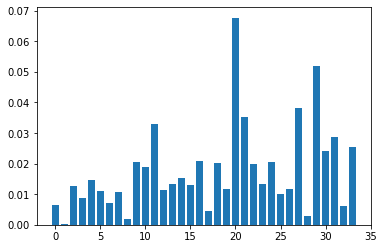

Attribute pat_geslacht_code has RMSE feature importance difference 0.012676563123645714
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00989866858045736
Attribute subloc_0 has RMSE feature importance difference 2.71704658186476e-05
Attribute subloc_2 has RMSE feature importance difference 0.0008064726367420462
Attribute subloc_3 has RMSE feature importance difference 3.8232497933507844e-05
Attribute subloc_4 has RMSE feature importance difference 6.051770697525976e-05
Attribute subloc_5 has RMSE feature importance difference 9.381342339302549e-05
Attribute subloc_6 has RMSE feature importance difference 1.1877700751648613e-05
Attribute subloc_7 has RMSE feature importance difference 0.008456504249654996
Attribute subloc_8 has RMSE feature importance difference 8.626872764662756e-05
Attribute subloc_9 has RMSE feature importance difference 0.00021735419343872907
Attribute stage_1 has RMSE feature importance difference 0.5815493322883449
Attribute stage_2

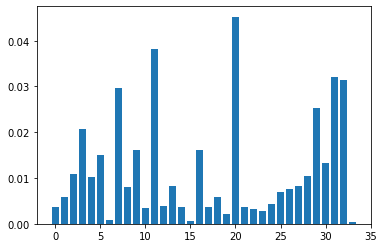

Attribute pat_geslacht_code has RMSE feature importance difference 0.013313183566455679
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008835777940622297
Attribute subloc_0 has RMSE feature importance difference 1.0467681252748463e-05
Attribute subloc_2 has RMSE feature importance difference 0.00027075499676815803
Attribute subloc_3 has RMSE feature importance difference 0.0001102615117820135
Attribute subloc_4 has RMSE feature importance difference 1.3484897005780597e-05
Attribute subloc_5 has RMSE feature importance difference 0.0002579638913930138
Attribute subloc_6 has RMSE feature importance difference 0.0004976975487615064
Attribute subloc_7 has RMSE feature importance difference 0.00737874403670826
Attribute subloc_8 has RMSE feature importance difference 2.4842941509270487e-05
Attribute subloc_9 has RMSE feature importance difference 0.0009183034769522631
Attribute stage_1 has RMSE feature importance difference 0.5735163283378852
Attribute stage

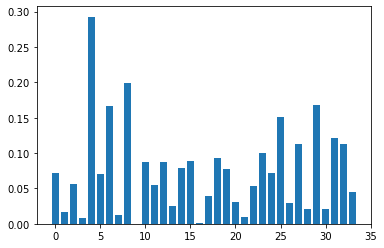

Attribute pat_geslacht_code has RMSE feature importance difference 0.002266815084252762
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.006962191083393515
Attribute subloc_0 has RMSE feature importance difference 0.0024142042443092517
Attribute subloc_2 has RMSE feature importance difference 0.0008066097357789471
Attribute subloc_3 has RMSE feature importance difference 0.07404495956233476
Attribute subloc_4 has RMSE feature importance difference 0.002687566604524703
Attribute subloc_5 has RMSE feature importance difference 0.02249829108341215
Attribute subloc_6 has RMSE feature importance difference 2.7711340773013905e-05
Attribute subloc_7 has RMSE feature importance difference 0.010938813189290983
Attribute subloc_8 has RMSE feature importance difference 0.00011573590335290794
Attribute subloc_9 has RMSE feature importance difference 0.0028290673508551984
Attribute stage_1 has RMSE feature importance difference 0.5490604295968708
Attribute stage_2 has

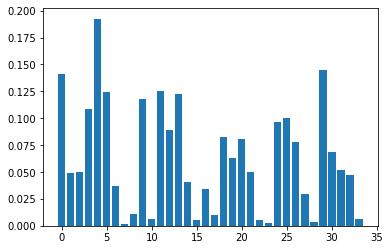

Attribute pat_geslacht_code has RMSE feature importance difference 0.00047285399528755904
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0025951334310350908
Attribute subloc_0 has RMSE feature importance difference 0.0018321755148394576
Attribute subloc_2 has RMSE feature importance difference 0.00516676153819624
Attribute subloc_3 has RMSE feature importance difference 0.029521281272998568
Attribute subloc_4 has RMSE feature importance difference 0.011181307740086731
Attribute subloc_5 has RMSE feature importance difference 0.0004172385102339905
Attribute subloc_6 has RMSE feature importance difference 3.110588271280851e-05
Attribute subloc_7 has RMSE feature importance difference 0.0069314452103340024
Attribute subloc_8 has RMSE feature importance difference 0.011311982254406668
Attribute subloc_9 has RMSE feature importance difference 0.0007438681589545258
Attribute stage_1 has RMSE feature importance difference 0.4489226115039805
Attribute stage_2 h

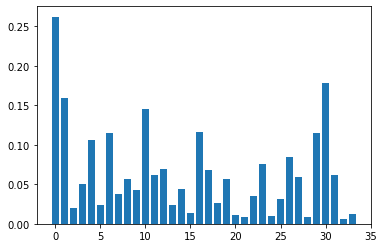

Attribute pat_geslacht_code has RMSE feature importance difference 0.02047719543445179
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.003550951495089036
Attribute subloc_0 has RMSE feature importance difference 0.00014172828639992448
Attribute subloc_2 has RMSE feature importance difference 0.0001678981647500216
Attribute subloc_3 has RMSE feature importance difference 0.007208730288628104
Attribute subloc_4 has RMSE feature importance difference 2.3180655695976124e-05
Attribute subloc_5 has RMSE feature importance difference 0.009606720090139017
Attribute subloc_6 has RMSE feature importance difference 0.0009612379052690414
Attribute subloc_7 has RMSE feature importance difference 0.0013423806633630357
Attribute subloc_8 has RMSE feature importance difference 0.000967884846891561
Attribute subloc_9 has RMSE feature importance difference 0.012596901378779972
Attribute stage_1 has RMSE feature importance difference 0.5390370516100972
Attribute stage_2 ha

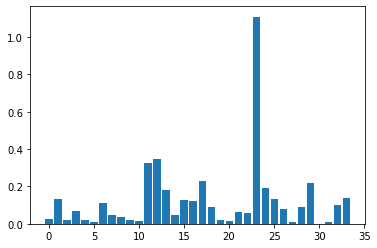

Attribute pat_geslacht_code has RMSE feature importance difference 0.008781052179430064
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0009276194414677485
Attribute subloc_0 has RMSE feature importance difference 0.00011021997602244323
Attribute subloc_2 has RMSE feature importance difference 0.000897229339320999
Attribute subloc_3 has RMSE feature importance difference 4.636093868852506e-06
Attribute subloc_4 has RMSE feature importance difference 0.00011422395583983681
Attribute subloc_5 has RMSE feature importance difference 0.008704952245841452
Attribute subloc_6 has RMSE feature importance difference 0.0015121991043976128
Attribute subloc_7 has RMSE feature importance difference 0.0035892778672558445
Attribute subloc_8 has RMSE feature importance difference 8.817942205522832e-05
Attribute subloc_9 has RMSE feature importance difference 0.00029976194106821636
Attribute stage_1 has RMSE feature importance difference 0.22009352972172253
Attribute stag

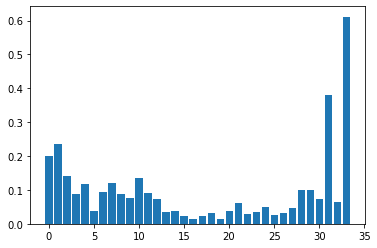

Attribute pat_geslacht_code has RMSE feature importance difference 0.006385780796263421
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.018159006396027005
Attribute subloc_0 has RMSE feature importance difference 0.017637340015027026
Attribute subloc_2 has RMSE feature importance difference 0.0024988379137802713
Attribute subloc_3 has RMSE feature importance difference 0.00946644940243056
Attribute subloc_4 has RMSE feature importance difference 0.00034466329458131164
Attribute subloc_5 has RMSE feature importance difference 0.005922627359570927
Attribute subloc_6 has RMSE feature importance difference 0.01251371152071158
Attribute subloc_7 has RMSE feature importance difference 2.2808509387334125e-05
Attribute subloc_8 has RMSE feature importance difference 0.004296318697242232
Attribute subloc_9 has RMSE feature importance difference 0.01058332190917338
Attribute stage_1 has RMSE feature importance difference 0.49479510569482976
Attribute stage_2 has R

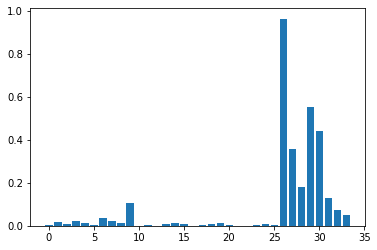

Attribute pat_geslacht_code has RMSE feature importance difference 0.013754199967992632
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.006362670071611661
Attribute subloc_0 has RMSE feature importance difference 1.941076877052301e-06
Attribute subloc_2 has RMSE feature importance difference 0.00021852219607192385
Attribute subloc_3 has RMSE feature importance difference 5.27160933622078e-05
Attribute subloc_4 has RMSE feature importance difference 0.0002661065404161915
Attribute subloc_5 has RMSE feature importance difference 0.00035609288461083165
Attribute subloc_6 has RMSE feature importance difference 0.00026319629600469893
Attribute subloc_7 has RMSE feature importance difference 0.006913503015402241
Attribute subloc_8 has RMSE feature importance difference 0.008695158727160158
Attribute subloc_9 has RMSE feature importance difference 0.0010527306673667127
Attribute stage_1 has RMSE feature importance difference 0.6274335441767322
Attribute stage_2

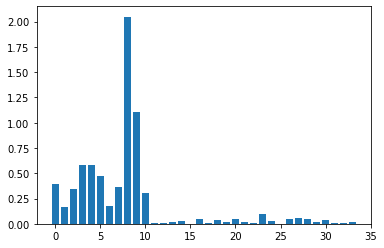

Attribute pat_geslacht_code has RMSE feature importance difference 0.07619309147644178
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.003909908462430369
Attribute subloc_0 has RMSE feature importance difference 0.11094896946795631
Attribute subloc_2 has RMSE feature importance difference 0.29593528573806394
Attribute subloc_3 has RMSE feature importance difference 0.3186866045801251
Attribute subloc_4 has RMSE feature importance difference 0.20692844529741478
Attribute subloc_5 has RMSE feature importance difference 0.024603942172965576
Attribute subloc_6 has RMSE feature importance difference 0.12665078652315986
Attribute subloc_7 has RMSE feature importance difference 3.821397954338464
Attribute subloc_8 has RMSE feature importance difference 1.208511070598222
Attribute subloc_9 has RMSE feature importance difference 0.07101245245332898
Attribute stage_1 has RMSE feature importance difference 0.6225544800699477
Attribute stage_2 has RMSE feature impor

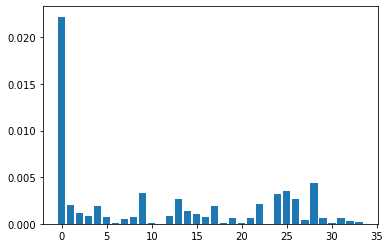

Attribute pat_geslacht_code has RMSE feature importance difference 0.009393169625291936
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009567271399430881
Attribute subloc_0 has RMSE feature importance difference 4.1746489435034015e-05
Attribute subloc_2 has RMSE feature importance difference 0.0013206750376691537
Attribute subloc_3 has RMSE feature importance difference 0.00035359901517163485
Attribute subloc_4 has RMSE feature importance difference 0.0003265041856899918
Attribute subloc_5 has RMSE feature importance difference 0.0002799006692150294
Attribute subloc_6 has RMSE feature importance difference 4.581743890839113e-05
Attribute subloc_7 has RMSE feature importance difference 0.008696344382221766
Attribute subloc_8 has RMSE feature importance difference 6.002909362811267e-05
Attribute subloc_9 has RMSE feature importance difference 0.0011364457211369393
Attribute stage_1 has RMSE feature importance difference 0.6327692845205548
Attribute stage_

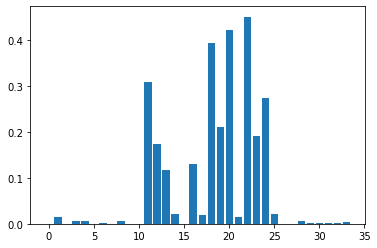

Attribute pat_geslacht_code has RMSE feature importance difference 0.014194684101714558
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007195576053624321
Attribute subloc_0 has RMSE feature importance difference 5.7846136751590244e-05
Attribute subloc_2 has RMSE feature importance difference 0.0010147169439861307
Attribute subloc_3 has RMSE feature importance difference 0.0002103057898009303
Attribute subloc_4 has RMSE feature importance difference 0.0003529643627312949
Attribute subloc_5 has RMSE feature importance difference 0.00024303392920959718
Attribute subloc_6 has RMSE feature importance difference 5.2807319698829914e-05
Attribute subloc_7 has RMSE feature importance difference 0.007891698510021646
Attribute subloc_8 has RMSE feature importance difference 0.00012331533584150126
Attribute subloc_9 has RMSE feature importance difference 0.001139460405289564
Attribute stage_1 has RMSE feature importance difference 0.2360521413181726
Attribute stage

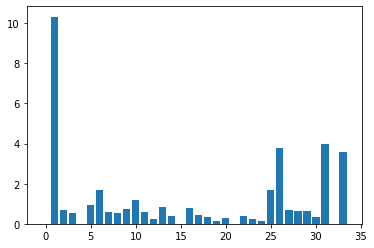

Attribute pat_geslacht_code has RMSE feature importance difference 0.011749729052320121
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 104.6162096464337
Attribute subloc_0 has RMSE feature importance difference 0.43088853234695224
Attribute subloc_2 has RMSE feature importance difference 0.2725760611867244
Attribute subloc_3 has RMSE feature importance difference 0.0001497732337923641
Attribute subloc_4 has RMSE feature importance difference 0.82237519889783
Attribute subloc_5 has RMSE feature importance difference 2.775286914272379
Attribute subloc_6 has RMSE feature importance difference 0.34095794158299214
Attribute subloc_7 has RMSE feature importance difference 0.20291583659994564
Attribute subloc_8 has RMSE feature importance difference 0.5528122599245859
Attribute subloc_9 has RMSE feature importance difference 1.3287808925004094
Attribute stage_1 has RMSE feature importance difference 0.03779345189543032
Attribute stage_2 has RMSE feature importan

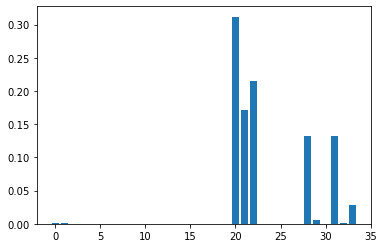

syn: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
Feature: pat_geslacht_code Score: 0.00000
Feature: tum_differentiatiegraad_code Score: 0.00000
Feature: subloc_0 Score: 0.00135
Feature: subloc_2 Score: 0.00000
Feature: subloc_3 Score: 0.00000
Feature: subloc_4 Score: 0.00000
Feature: subloc_5 Score: 0.00000
Feature: subloc_6 Score: 0.00000
Feature: subloc_7 Score: 0.00033
Feature: subloc_8 Score: 0.00000
Feature: subloc_9 Score: 0.00000
Feature: stage_1 Score: 0.00000
Feature: stage_2 Score: 0.00000
Feature: stage_2A Score: 0.00000
Feature: stage_2B Score: 0.00000
Feature: stage_2C Score: 0.00000
Feature: stage_3 Score: 0.00000
Feature: stage_3A Score: 0.00000
Feature: stage_3B Score: 0.00000
Feature: stage_3C Score: 0.00000
Feature: stage_4 Score: 0.30835
Feature: stage_4A Score: 0.16379
Feature: stage_4B Score: 0.19143
Feature: stage_4C Score: 0.00000
Feature: stage_M Score: 0.00000
Feature: stage_X Score: 0.00000
Feature: diagnosis_age_0-20 Score

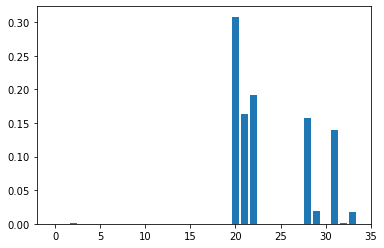

Attribute pat_geslacht_code has RMSE feature importance difference 3.9216829522689377e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 1.3040380874616318e-06
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 7.419582702050968e-09
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE fea

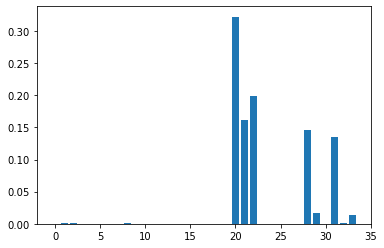

Attribute pat_geslacht_code has RMSE feature importance difference 1.9857898229339758e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 1.683545453601333e-06
Attribute subloc_0 has RMSE feature importance difference 1.0663188073593273e-06
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 7.757703324683207e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE fea

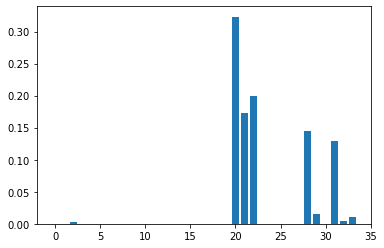

Attribute pat_geslacht_code has RMSE feature importance difference 1.3772344308489662e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 2.371832719992768e-07
Attribute subloc_0 has RMSE feature importance difference 3.8103044739703747e-06
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE fea

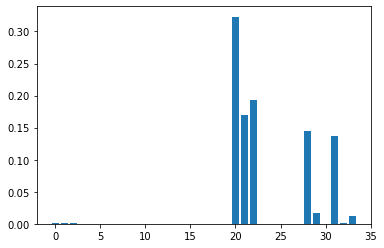

Attribute pat_geslacht_code has RMSE feature importance difference 8.10235415537575e-09
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.782912016780069e-09
Attribute subloc_0 has RMSE feature importance difference 2.5250503693983845e-07
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featu

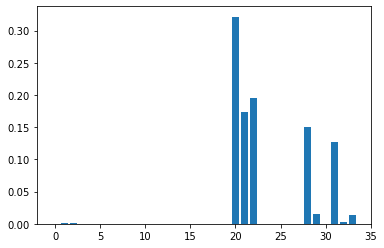

Attribute pat_geslacht_code has RMSE feature importance difference 2.0129442797291026e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 3.3716622470805433e-10
Attribute subloc_0 has RMSE feature importance difference 1.1925562359589223e-07
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 3.5242863829924793e-09
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE f

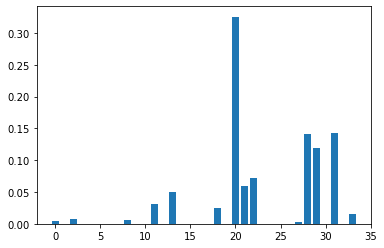

Attribute pat_geslacht_code has RMSE feature importance difference 1.3693537804964183e-05
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 6.273346525459947e-05
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 2.890450000396479e-05
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0009754502214820636
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0024833172824350

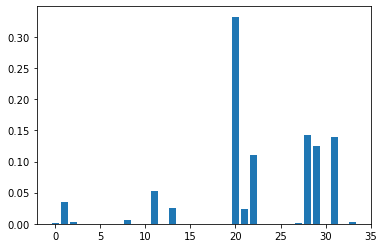

Attribute pat_geslacht_code has RMSE feature importance difference 3.4786173997190994e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.001125461853007174
Attribute subloc_0 has RMSE feature importance difference 9.271320748180147e-06
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 3.300063238904611e-05
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0027980311857964775
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.00067697499764473

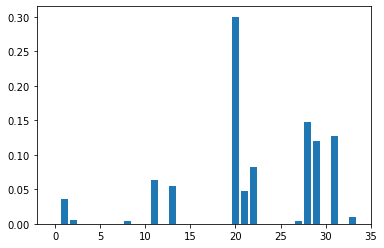

Attribute pat_geslacht_code has RMSE feature importance difference 8.745653618517974e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0012442807863694697
Attribute subloc_0 has RMSE feature importance difference 2.236750917453741e-05
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 1.4683122948513415e-05
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.003939151072942776
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.00299586292968295

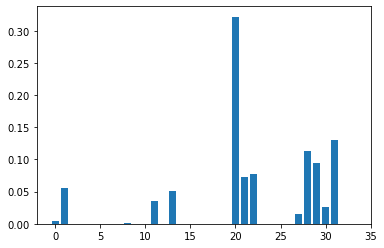

Attribute pat_geslacht_code has RMSE feature importance difference 1.2381916483883602e-05
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.002972279368415297
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 6.969884365040807e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0012826722717387132
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.00252682009351478

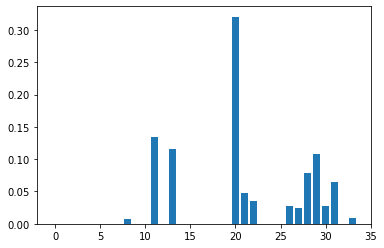

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.31930249201922e-05
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.018067762746057515
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.013353405135632745

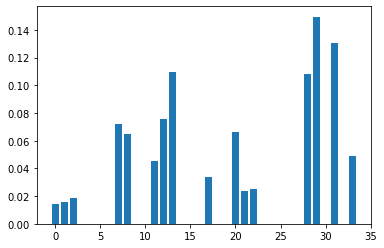

Attribute pat_geslacht_code has RMSE feature importance difference 0.0001780579314324391
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00021614216703585697
Attribute subloc_0 has RMSE feature importance difference 0.0003260623152819446
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.005214865285605462
Attribute subloc_7 has RMSE feature importance difference 0.004193019431154171
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0020291694821861447
Attribute stage_2 has RMSE feature importance difference 0.005676710377198298
Attribute stage_2A has RMSE feature importa

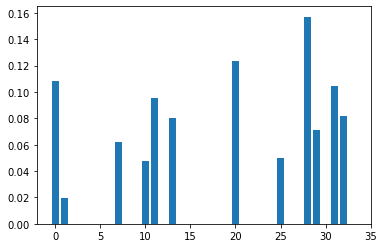

Attribute pat_geslacht_code has RMSE feature importance difference 0.011636425429193693
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00036683128783387205
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0038196090466198437
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0022327338525619605
Attribute stage_1 has RMSE feature importance difference 0.009074708026911701
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature import

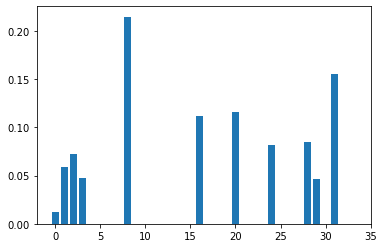

Attribute pat_geslacht_code has RMSE feature importance difference 0.00012463600601903555
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0033329894816396598
Attribute subloc_0 has RMSE feature importance difference 0.005173712962901454
Attribute subloc_2 has RMSE feature importance difference 0.002203014237101256
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.0459072101219329
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B 

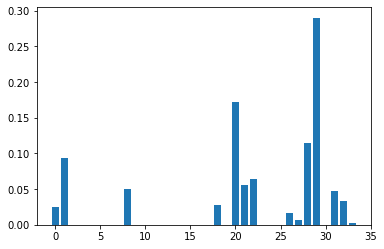

Attribute pat_geslacht_code has RMSE feature importance difference 0.0005974930690787903
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008513709968554483
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.0024822185119559733
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featur

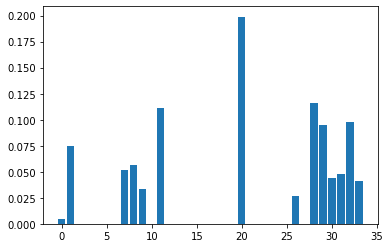

Attribute pat_geslacht_code has RMSE feature importance difference 1.616997837252708e-05
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.005524676282080081
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0026398269693036934
Attribute subloc_7 has RMSE feature importance difference 0.003214762477883446
Attribute subloc_8 has RMSE feature importance difference 0.0011248433046400646
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.012316679398705614
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importan

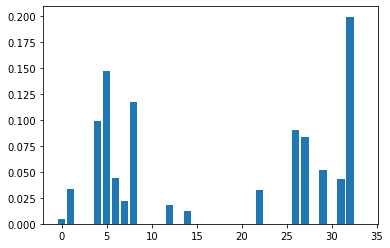

Attribute pat_geslacht_code has RMSE feature importance difference 1.8554233782227852e-05
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0011037654078020077
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.009842374510939285
Attribute subloc_4 has RMSE feature importance difference 0.02167450710684035
Attribute subloc_5 has RMSE feature importance difference 0.0019404073414603295
Attribute subloc_6 has RMSE feature importance difference 0.00047561581995149335
Attribute subloc_7 has RMSE feature importance difference 0.013778094201313805
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0003160353799725201
Attribu

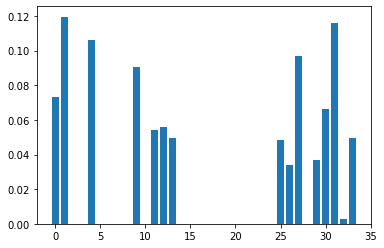

Attribute pat_geslacht_code has RMSE feature importance difference 0.005277584337357582
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.014139969312074388
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.011294635734981217
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.008200293386801753
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.00293244521816537
Attribute stage_2 has RMSE feature importance difference 0.003107162696743404
Attribute stage_2A has RMSE fe

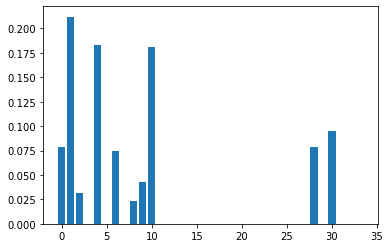

Attribute pat_geslacht_code has RMSE feature importance difference 0.006017617820205253
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.04465968605082181
Attribute subloc_0 has RMSE feature importance difference 0.0009726095154261367
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.03348445981640072
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.005558509119915575
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.0005313168551803973
Attribute subloc_8 has RMSE feature importance difference 0.001831156581018304
Attribute subloc_9 has RMSE feature importance difference 0.032605795889902776
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE fea

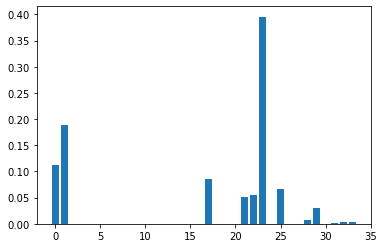

Attribute pat_geslacht_code has RMSE feature importance difference 0.012350214305595627
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.035339042696790585
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature

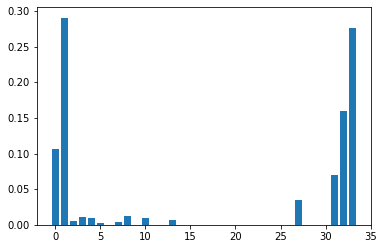

Attribute pat_geslacht_code has RMSE feature importance difference 0.011327328427877583
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.08418640656986032
Attribute subloc_0 has RMSE feature importance difference 3.058251487129031e-05
Attribute subloc_2 has RMSE feature importance difference 0.00011876177505629013
Attribute subloc_3 has RMSE feature importance difference 9.101671813374309e-05
Attribute subloc_4 has RMSE feature importance difference 8.944100939407834e-06
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 1.1093044567122032e-05
Attribute subloc_7 has RMSE feature importance difference 0.0001335029574059967
Attribute subloc_8 has RMSE feature importance difference 3.56130173861122e-11
Attribute subloc_9 has RMSE feature importance difference 8.202740954157207e-05
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance diff

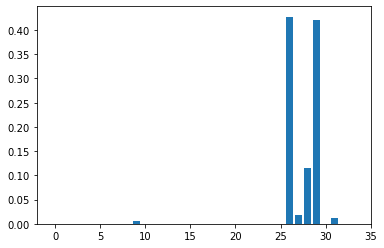

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 4.489123866966687e-05
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 1.063836869923385e-09
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 

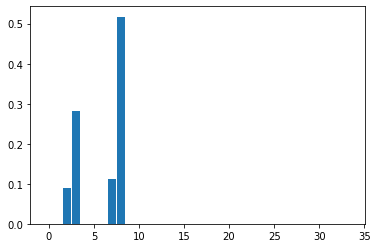

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 0.007902607787351888
Attribute subloc_2 has RMSE feature importance difference 0.07975726273373543
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.01232112857347173
Attribute subloc_7 has RMSE feature importance difference 0.26734009836011513
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Att

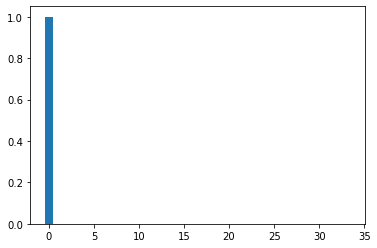

Attribute pat_geslacht_code has RMSE feature importance difference 0.9987380228348565
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature 

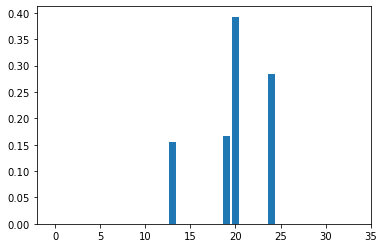

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 4.788520742486507e-07
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 4.503826903187357e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.02428947059656724
Attribute stage_

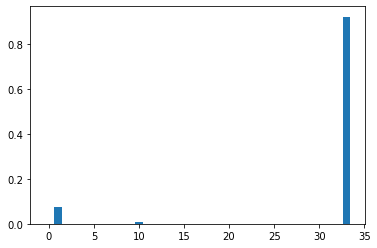

Attribute pat_geslacht_code has RMSE feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.005278001787512476
Attribute subloc_0 has RMSE feature importance difference 4.492477609385579e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.844886698824033e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 4.175256269107617e-05
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage

In [12]:
# Do for one DP algorithm at a time
privacy_levels = pb_privacy_levels

pb_FID_ORI, pb_FID, pb_FID_ERRORS = FIDmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
ori: LogisticRegression(C=1, max_iter=4000)
accuracy of original model is 0.7525734181047532
Feature: pat_geslacht_code Score: 0.11914
Feature: tum_differentiatiegraad_code Score: 0.09979
Feature: subloc_0 Score: 0.00761
Feature: subloc_2 Score: 0.03713
Feature: subloc_3 Score: 0.02073
Feature: subloc_4 Score: 0.01879
Feature: subloc_5 Score: 0.01680
Feature: subloc_6 Score: 0.00727
Feature: subloc_7 Score: 0.09399
Feature: subloc_8 Score: 0.01110
Feature: subloc_9 Score: 0.03376
Feature: stage_1 Score: 0.79550
Feature: stage_2 Score: 0.46909
Feature: stage_2A Score: 0.73205
Feature: stage_2B Score: 0.17046
Feature: stage_2C Score: 0.06639
Feature: stage_3 Score: 0.19980
Feature: stage_3A Score: 0.19796
Feature: stage_3B Score: 0.34043
Feature: stage_3C Score: 0.04847
Feature: stage_4 Score: 0.56547
Feature: stage_4A Score: 0.33246
Feature: stage_4B Score: 0.64325
Featu

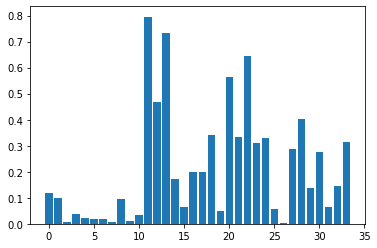

Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=0.0001, max_iter=4000)
Feature: pat_geslacht_code Score: 0.00281
Feature: tum_differentiatiegraad_code Score: 0.00015
Feature: subloc_0 Score: 0.00148
Feature: subloc_2 Score: 0.00135
Feature: subloc_3 Score: 0.00063
Feature: subloc_4 Score: 0.00010
Feature: subloc_5 Score: 0.00044
Feature: subloc_6 Score: 0.00091
Feature: subloc_7 Score: 0.00043
Feature: subloc_8 Score: 0.00006
Feature: subloc_9 Score: 0.00011
Feature: stage_1 Score: 0.00087
Feature: stage_2 Score: 0.00077
Feature: stage_2A Score: 0.00002
Feature: stage_2B Score: 0.00009
Feature: stage_2C Score: 0.00030
Feature: stage_3 Score: 0.00101
Feature: stage_3A Score: 0.00017
Feature: stage_3B Score: 0.00128
Feature: stage_3C Score: 0.00097
Feature: stage_4 Score: 0.00070
Feature: stage_4A Score: 0.00014
Feature: stage_4B Score: 0.00042
Feature: stage_4C Score: 0.00007
Feature: stage_M Score: 0.00005
Feature: stage_X Sco

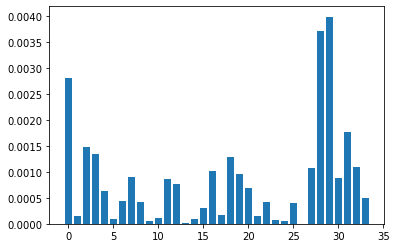

Attribute pat_geslacht_code has squared feature importance difference 0.006674378696979945
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.937042247814579e-05
Attribute subloc_0 has squared feature importance difference 0.002548313712420061
Attribute subloc_2 has squared feature importance difference 0.0017663851299466375
Attribute subloc_3 has squared feature importance difference 0.0003593015163725412
Attribute subloc_4 has squared feature importance difference 7.222244779836565e-07
Attribute subloc_5 has squared feature importance difference 0.00016549427606500755
Attribute subloc_6 has squared feature importance difference 0.0009392884412737199
Attribute subloc_7 has squared feature importance difference 4.243842911662426e-06
Attribute subloc_8 has squared feature importance difference 3.4602946355392714e-07
Attribute subloc_9 has squared feature importance difference 3.8307806234258393e-07
Attribute stage_1 has squared feature importance differen

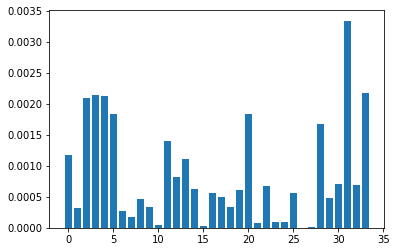

Attribute pat_geslacht_code has squared feature importance difference 0.0005530205596736238
Attribute tum_differentiatiegraad_code has squared feature importance difference 7.20943837463726e-06
Attribute subloc_0 has squared feature importance difference 0.004939910119660965
Attribute subloc_2 has squared feature importance difference 0.004590640866926139
Attribute subloc_3 has squared feature importance difference 0.004848512248951083
Attribute subloc_4 has squared feature importance difference 0.0035566650726276965
Attribute subloc_5 has squared feature importance difference 4.8310381588503346e-05
Attribute subloc_6 has squared feature importance difference 2.4130681218481284e-05
Attribute subloc_7 has squared feature importance difference 9.060537121427738e-06
Attribute subloc_8 has squared feature importance difference 9.670242963677017e-05
Attribute subloc_9 has squared feature importance difference 8.342983459847963e-06
Attribute stage_1 has squared feature importance difference 

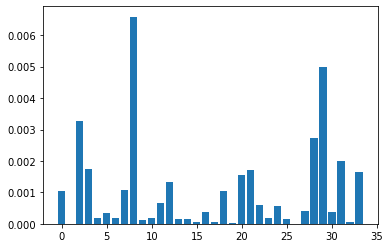

Attribute pat_geslacht_code has squared feature importance difference 0.0001634207561697616
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0001835593841143953
Attribute subloc_0 has squared feature importance difference 0.00819087324117746
Attribute subloc_2 has squared feature importance difference 0.0019602216653180245
Attribute subloc_3 has squared feature importance difference 7.879405876223358e-06
Attribute subloc_4 has squared feature importance difference 5.678331434174404e-05
Attribute subloc_5 has squared feature importance difference 1.0999822382645922e-05
Attribute subloc_6 has squared feature importance difference 0.0008508191425736346
Attribute subloc_7 has squared feature importance difference 0.02966748664390453
Attribute subloc_8 has squared feature importance difference 5.032307139802641e-06
Attribute subloc_9 has squared feature importance difference 6.392705701773703e-07
Attribute stage_1 has squared feature importance difference 0

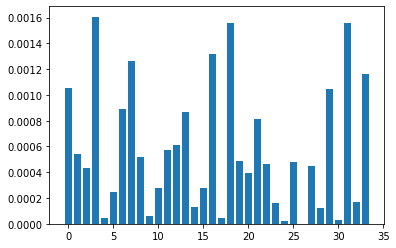

Attribute pat_geslacht_code has squared feature importance difference 0.0013891867572013807
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00019174828615759534
Attribute subloc_0 has squared feature importance difference 0.0004351311427212328
Attribute subloc_2 has squared feature importance difference 0.005882101446847908
Attribute subloc_3 has squared feature importance difference 1.292704719448609e-07
Attribute subloc_4 has squared feature importance difference 0.00010291568337837682
Attribute subloc_5 has squared feature importance difference 0.0018417799124883566
Attribute subloc_6 has squared feature importance difference 0.004003764571537372
Attribute subloc_7 has squared feature importance difference 0.0001826947722126167
Attribute subloc_8 has squared feature importance difference 2.5774030388781316e-06
Attribute subloc_9 has squared feature importance difference 9.147006681574005e-05
Attribute stage_1 has squared feature importance differen

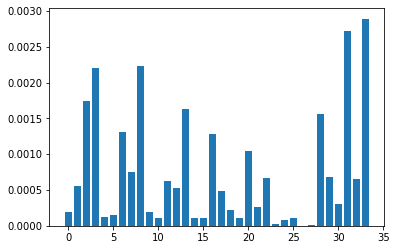

Attribute pat_geslacht_code has squared feature importance difference 7.87026587387214e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.21950694955858e-05
Attribute subloc_0 has squared feature importance difference 0.004456164659950911
Attribute subloc_2 has squared feature importance difference 0.0065480256189856196
Attribute subloc_3 has squared feature importance difference 3.6189453586810782e-06
Attribute subloc_4 has squared feature importance difference 1.2210272225530429e-05
Attribute subloc_5 has squared feature importance difference 0.0023662695270965455
Attribute subloc_6 has squared feature importance difference 0.0007987186000873342
Attribute subloc_7 has squared feature importance difference 0.005484644301772696
Attribute subloc_8 has squared feature importance difference 3.494019620233007e-05
Attribute subloc_9 has squared feature importance difference 2.678986577538101e-07
Attribute stage_1 has squared feature importance difference 

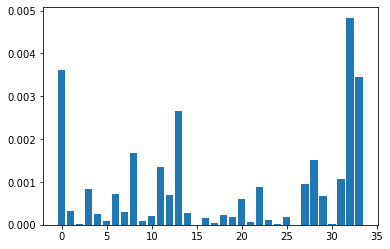

Attribute pat_geslacht_code has squared feature importance difference 0.012714544449043961
Attribute tum_differentiatiegraad_code has squared feature importance difference 3.5286372816259883e-06
Attribute subloc_0 has squared feature importance difference 7.853497281407998e-08
Attribute subloc_2 has squared feature importance difference 0.000624624116425085
Attribute subloc_3 has squared feature importance difference 4.237695983414097e-05
Attribute subloc_4 has squared feature importance difference 9.061921073618236e-07
Attribute subloc_5 has squared feature importance difference 0.0005592414902507255
Attribute subloc_6 has squared feature importance difference 9.012301686914529e-05
Attribute subloc_7 has squared feature importance difference 0.0021701778576196924
Attribute subloc_8 has squared feature importance difference 2.8784575869712797e-06
Attribute subloc_9 has squared feature importance difference 9.12157402817623e-06
Attribute stage_1 has squared feature importance difference

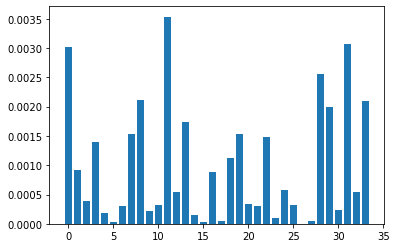

Attribute pat_geslacht_code has squared feature importance difference 0.005400901907519797
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00018367992687817327
Attribute subloc_0 has squared feature importance difference 0.00010772742020049047
Attribute subloc_2 has squared feature importance difference 0.0013208774263267168
Attribute subloc_3 has squared feature importance difference 7.480028277294713e-06
Attribute subloc_4 has squared feature importance difference 2.510089021347916e-06
Attribute subloc_5 has squared feature importance difference 4.245595001231927e-05
Attribute subloc_6 has squared feature importance difference 0.001969967053542927
Attribute subloc_7 has squared feature importance difference 0.0024787013446484194
Attribute subloc_8 has squared feature importance difference 2.3038805743961215e-05
Attribute subloc_9 has squared feature importance difference 2.458358591595392e-05
Attribute stage_1 has squared feature importance differen

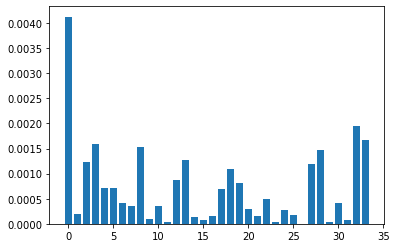

Attribute pat_geslacht_code has squared feature importance difference 0.022773912497794535
Attribute tum_differentiatiegraad_code has squared feature importance difference 2.888657822051585e-05
Attribute subloc_0 has squared feature importance difference 0.002418893859198783
Attribute subloc_2 has squared feature importance difference 0.0034905351501202508
Attribute subloc_3 has squared feature importance difference 0.0006759774903535709
Attribute subloc_4 has squared feature importance difference 0.0006898600153310329
Attribute subloc_5 has squared feature importance difference 0.00020581682792995265
Attribute subloc_6 has squared feature importance difference 0.00017144254051049764
Attribute subloc_7 has squared feature importance difference 0.0024340778391968012
Attribute subloc_8 has squared feature importance difference 5.685852815123895e-06
Attribute subloc_9 has squared feature importance difference 0.00010153154029383974
Attribute stage_1 has squared feature importance differen

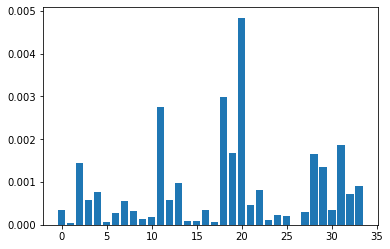

Attribute pat_geslacht_code has squared feature importance difference 1.4729609190127233e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0001524845130016932
Attribute subloc_0 has squared feature importance difference 0.0025929376237871452
Attribute subloc_2 has squared feature importance difference 0.0002403618151913561
Attribute subloc_3 has squared feature importance difference 0.0005867655704915627
Attribute subloc_4 has squared feature importance difference 2.8018663286126726e-07
Attribute subloc_5 has squared feature importance difference 5.104641473168949e-05
Attribute subloc_6 has squared feature importance difference 0.00034879852002276323
Attribute subloc_7 has squared feature importance difference 1.6916314012860425e-06
Attribute subloc_8 has squared feature importance difference 1.2040087234743846e-05
Attribute subloc_9 has squared feature importance difference 4.570662841559623e-06
Attribute stage_1 has squared feature importance diff

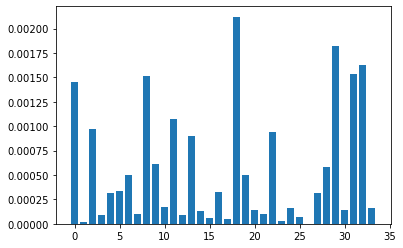

Attribute pat_geslacht_code has squared feature importance difference 0.003656480180629634
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0001534513178557277
Attribute subloc_0 has squared feature importance difference 0.0025144286384672855
Attribute subloc_2 has squared feature importance difference 2.4858827283612037e-07
Attribute subloc_3 has squared feature importance difference 0.0001974736550470115
Attribute subloc_4 has squared feature importance difference 0.00022536298826426632
Attribute subloc_5 has squared feature importance difference 0.0005764812212777743
Attribute subloc_6 has squared feature importance difference 1.7367265285618226e-05
Attribute subloc_7 has squared feature importance difference 0.004466077085979839
Attribute subloc_8 has squared feature importance difference 0.0009633430622029056
Attribute subloc_9 has squared feature importance difference 2.204145868861198e-05
Attribute stage_1 has squared feature importance differen

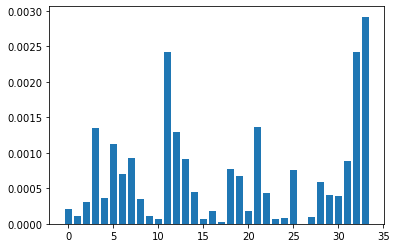

Attribute pat_geslacht_code has squared feature importance difference 4.908023419437731e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.064552901672733e-05
Attribute subloc_0 has squared feature importance difference 0.00015285485857977066
Attribute subloc_2 has squared feature importance difference 0.0028609532871423874
Attribute subloc_3 has squared feature importance difference 0.0001649082753119384
Attribute subloc_4 has squared feature importance difference 0.0021360187378009553
Attribute subloc_5 has squared feature importance difference 0.0008123556961525795
Attribute subloc_6 has squared feature importance difference 0.0015540204544775174
Attribute subloc_7 has squared feature importance difference 5.2695537934580685e-06
Attribute subloc_8 has squared feature importance difference 1.2711496092736512e-05
Attribute subloc_9 has squared feature importance difference 2.152941472771186e-06
Attribute stage_1 has squared feature importance differ

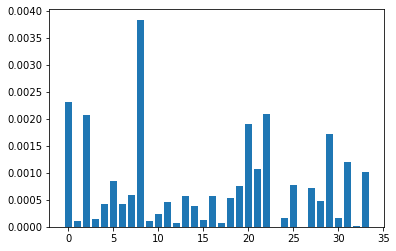

Attribute pat_geslacht_code has squared feature importance difference 0.00527439444647297
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.355207033830858e-05
Attribute subloc_0 has squared feature importance difference 0.00618105556801202
Attribute subloc_2 has squared feature importance difference 4.0683099396446957e-07
Attribute subloc_3 has squared feature importance difference 0.00018293708988174876
Attribute subloc_4 has squared feature importance difference 0.0009000950496751031
Attribute subloc_5 has squared feature importance difference 0.00019211640572742856
Attribute subloc_6 has squared feature importance difference 0.00048391733286006703
Attribute subloc_7 has squared feature importance difference 0.018256846206782005
Attribute subloc_8 has squared feature importance difference 7.566629280113249e-06
Attribute subloc_9 has squared feature importance difference 2.1288998405982485e-05
Attribute stage_1 has squared feature importance differenc

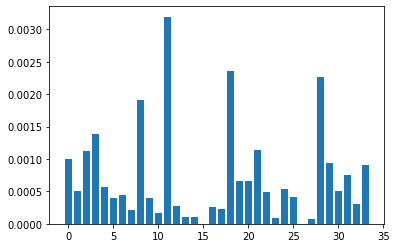

Attribute pat_geslacht_code has squared feature importance difference 0.000612421854153825
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.981205435216484e-05
Attribute subloc_0 has squared feature importance difference 0.0020318884965227152
Attribute subloc_2 has squared feature importance difference 0.0026779573689428775
Attribute subloc_3 has squared feature importance difference 0.0004314671859850397
Attribute subloc_4 has squared feature importance difference 0.0001984243729830549
Attribute subloc_5 has squared feature importance difference 0.0002489368464372617
Attribute subloc_6 has squared feature importance difference 5.608637817814284e-05
Attribute subloc_7 has squared feature importance difference 0.0042875183486436735
Attribute subloc_8 has squared feature importance difference 0.00022392550666111411
Attribute subloc_9 has squared feature importance difference 5.795125943829718e-06
Attribute stage_1 has squared feature importance differenc

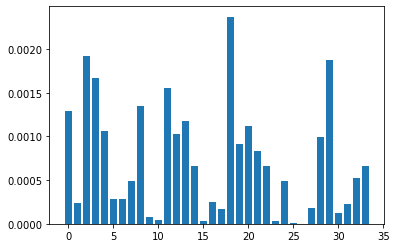

Attribute pat_geslacht_code has squared feature importance difference 0.0013319076061315545
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.6532697265641262e-05
Attribute subloc_0 has squared feature importance difference 0.005931438445093864
Attribute subloc_2 has squared feature importance difference 0.0039225709294318225
Attribute subloc_3 has squared feature importance difference 0.001644411080774016
Attribute subloc_4 has squared feature importance difference 7.91102106758517e-05
Attribute subloc_5 has squared feature importance difference 8.463051921335065e-05
Attribute subloc_6 has squared feature importance difference 0.00035792566200685384
Attribute subloc_7 has squared feature importance difference 0.0017735843641502732
Attribute subloc_8 has squared feature importance difference 2.3403732824757694e-06
Attribute subloc_9 has squared feature importance difference 8.006728081536287e-06
Attribute stage_1 has squared feature importance differenc

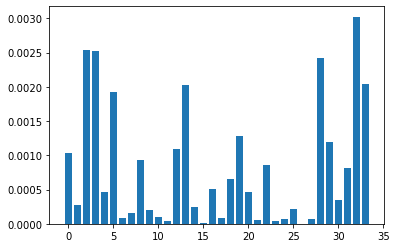

Attribute pat_geslacht_code has squared feature importance difference 0.00043812252419879005
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.4681287212039627e-05
Attribute subloc_0 has squared feature importance difference 0.008150675384114923
Attribute subloc_2 has squared feature importance difference 0.007369192808411223
Attribute subloc_3 has squared feature importance difference 0.00018810533194247328
Attribute subloc_4 has squared feature importance difference 0.0044877536514010535
Attribute subloc_5 has squared feature importance difference 7.940919797571721e-07
Attribute subloc_6 has squared feature importance difference 2.366539184393755e-05
Attribute subloc_7 has squared feature importance difference 0.0004321740128978895
Attribute subloc_8 has squared feature importance difference 3.417173406432181e-05
Attribute subloc_9 has squared feature importance difference 1.4791192671332536e-06
Attribute stage_1 has squared feature importance differe

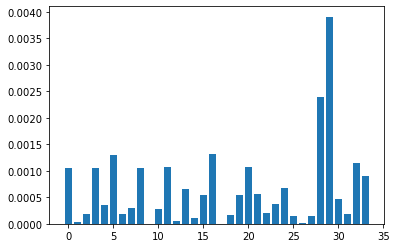

Attribute pat_geslacht_code has squared feature importance difference 0.0009583640335520536
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00014834365389646172
Attribute subloc_0 has squared feature importance difference 4.718879098557049e-05
Attribute subloc_2 has squared feature importance difference 0.0017589061778433
Attribute subloc_3 has squared feature importance difference 0.00017853441865374933
Attribute subloc_4 has squared feature importance difference 0.0030895397195527864
Attribute subloc_5 has squared feature importance difference 3.327725096607657e-05
Attribute subloc_6 has squared feature importance difference 0.00014709267308258365
Attribute subloc_7 has squared feature importance difference 0.001195593785520962
Attribute subloc_8 has squared feature importance difference 2.279901796008639e-06
Attribute subloc_9 has squared feature importance difference 5.785238728609952e-05
Attribute stage_1 has squared feature importance difference

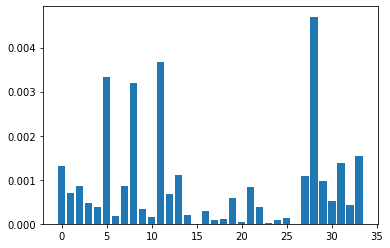

Attribute pat_geslacht_code has squared feature importance difference 0.0006960202930570377
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.536127699854468e-05
Attribute subloc_0 has squared feature importance difference 0.0007464900307257418
Attribute subloc_2 has squared feature importance difference 0.00011400443247030576
Attribute subloc_3 has squared feature importance difference 9.367101079460531e-05
Attribute subloc_4 has squared feature importance difference 0.011294327951745415
Attribute subloc_5 has squared feature importance difference 1.3320487462680697e-05
Attribute subloc_6 has squared feature importance difference 0.0007130188714481815
Attribute subloc_7 has squared feature importance difference 0.008376801927345906
Attribute subloc_8 has squared feature importance difference 9.098439276477805e-05
Attribute subloc_9 has squared feature importance difference 6.284717376225596e-08
Attribute stage_1 has squared feature importance differenc

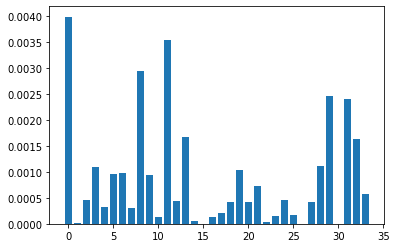

Attribute pat_geslacht_code has squared feature importance difference 0.013432093763965631
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00016351864636972245
Attribute subloc_0 has squared feature importance difference 0.000205482803442194
Attribute subloc_2 has squared feature importance difference 0.000980627538827756
Attribute subloc_3 has squared feature importance difference 6.53427461788135e-05
Attribute subloc_4 has squared feature importance difference 0.0008453368149617074
Attribute subloc_5 has squared feature importance difference 0.0009200104341876589
Attribute subloc_6 has squared feature importance difference 8.453559085833278e-05
Attribute subloc_7 has squared feature importance difference 0.0071903400976203
Attribute subloc_8 has squared feature importance difference 0.0008899366193185403
Attribute subloc_9 has squared feature importance difference 3.049991615409814e-07
Attribute stage_1 has squared feature importance difference 7.80

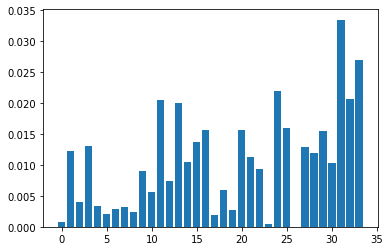

Attribute pat_geslacht_code has squared feature importance difference 0.00019177139266781564
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0003980247572976645
Attribute subloc_0 has squared feature importance difference 9.756753753149923e-05
Attribute subloc_2 has squared feature importance difference 0.0009529642145313526
Attribute subloc_3 has squared feature importance difference 4.179527913194646e-05
Attribute subloc_4 has squared feature importance difference 1.1141940363067022e-05
Attribute subloc_5 has squared feature importance difference 2.9418863162171535e-05
Attribute subloc_6 has squared feature importance difference 5.888950938113447e-05
Attribute subloc_7 has squared feature importance difference 4.104863792878364e-05
Attribute subloc_8 has squared feature importance difference 0.0005404763874197335
Attribute subloc_9 has squared feature importance difference 0.00011935642029105859
Attribute stage_1 has squared feature importance diffe

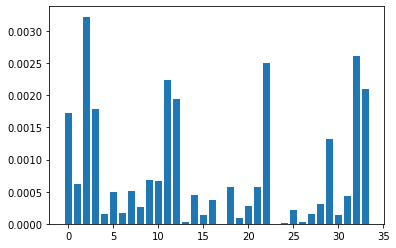

Attribute pat_geslacht_code has squared feature importance difference 0.002328275347151958
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.812813278185293e-05
Attribute subloc_0 has squared feature importance difference 0.014236771764829672
Attribute subloc_2 has squared feature importance difference 0.0038277897217753264
Attribute subloc_3 has squared feature importance difference 7.761940316494427e-06
Attribute subloc_4 has squared feature importance difference 0.0002572706513599424
Attribute subloc_5 has squared feature importance difference 1.7211124251818898e-05
Attribute subloc_6 has squared feature importance difference 0.00032071661701153553
Attribute subloc_7 has squared feature importance difference 9.741079333269817e-06
Attribute subloc_8 has squared feature importance difference 0.000585518243275018
Attribute subloc_9 has squared feature importance difference 0.00040452549486401265
Attribute stage_1 has squared feature importance differenc

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

Only one class left in synthetic dataset, no Logistic Regression possible. Coefficients are set to 0
Attribute pat_geslacht_code has squared feature importance difference 0.002328275347151958
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.812813278185293e-05
Attribute subloc_0 has squared feature importance difference 0.014236771764829672
Attribute subloc_2 has squared feature importance difference 0.0038277897217753264
Attribute subloc_3 has squared feature importance difference 7.761940316494427e-06
Attribute subloc_4 has squared feature importance difference 0.0002572706513599424
Attribute subloc_5 has squared feature importance difference 1.7211124251818898e-05
Attribute subloc_6 has squared feature importance difference 0.00032071661701153553
Attribute subloc_7 has squared feature importance difference 9.741079333269817e-06
Attribute subloc_8 has squared feature importance difference 0.000585518243275018
Attribute subloc_9 has squared feature im

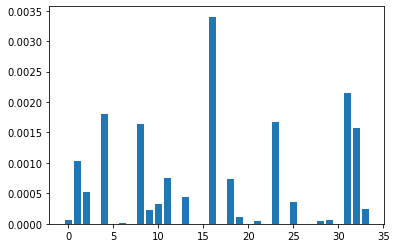

Attribute pat_geslacht_code has squared feature importance difference 0.00016673369725230759
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.002108594218816543
Attribute subloc_0 has squared feature importance difference 0.0008641143278780109
Attribute subloc_2 has squared feature importance difference 2.5489135037098758e-05
Attribute subloc_3 has squared feature importance difference 0.010484633108896354
Attribute subloc_4 has squared feature importance difference 6.52574214737124e-06
Attribute subloc_5 has squared feature importance difference 2.8013689755575346e-06
Attribute subloc_6 has squared feature importance difference 9.763222246623935e-07
Attribute subloc_7 has squared feature importance difference 0.0068033574375131346
Attribute subloc_8 has squared feature importance difference 0.00012806305766474116
Attribute subloc_9 has squared feature importance difference 0.00021236163547302107
Attribute stage_1 has squared feature importance differe

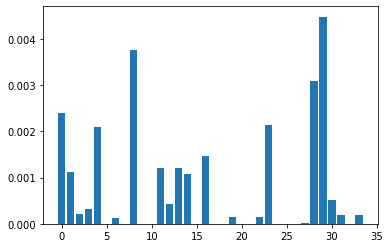

Attribute pat_geslacht_code has squared feature importance difference 0.005617227949771469
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0008321578550988862
Attribute subloc_0 has squared feature importance difference 5.2611637396922205e-05
Attribute subloc_2 has squared feature importance difference 5.1580891920508076e-05
Attribute subloc_3 has squared feature importance difference 0.0059124116299882614
Attribute subloc_4 has squared feature importance difference 6.52574214737124e-06
Attribute subloc_5 has squared feature importance difference 5.902417523643594e-06
Attribute subloc_6 has squared feature importance difference 9.763222246623935e-07
Attribute subloc_7 has squared feature importance difference 0.016880507911171724
Attribute subloc_8 has squared feature importance difference 2.279901796008639e-06
Attribute subloc_9 has squared feature importance difference 2.1066786274170048e-05
Attribute stage_1 has squared feature importance differenc

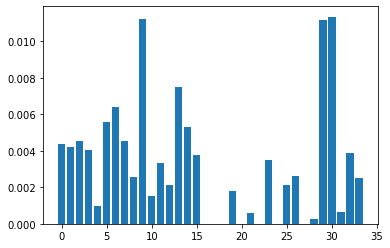

Attribute pat_geslacht_code has squared feature importance difference 0.0005190972932146159
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0005658820567576009
Attribute subloc_0 has squared feature importance difference 0.0015519521071187697
Attribute subloc_2 has squared feature importance difference 0.0009602992740643582
Attribute subloc_3 has squared feature importance difference 3.706717520164969e-05
Attribute subloc_4 has squared feature importance difference 0.002201931134035902
Attribute subloc_5 has squared feature importance difference 0.0029959153433394116
Attribute subloc_6 has squared feature importance difference 0.0015501842274454579
Attribute subloc_7 has squared feature importance difference 9.877054347521277e-05
Attribute subloc_8 has squared feature importance difference 0.009653056871159551
Attribute subloc_9 has squared feature importance difference 7.971181322098501e-05
Attribute stage_1 has squared feature importance difference 

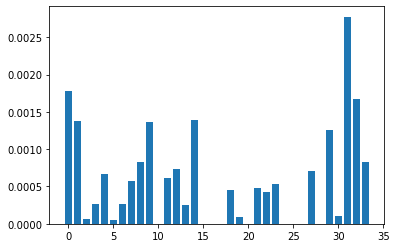

Attribute pat_geslacht_code has squared feature importance difference 0.005659159361693271
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0032088510256915144
Attribute subloc_0 has squared feature importance difference 3.972920502311e-06
Attribute subloc_2 has squared feature importance difference 6.817524887333553e-05
Attribute subloc_3 has squared feature importance difference 0.0009758719210198321
Attribute subloc_4 has squared feature importance difference 1.1775845005036744e-07
Attribute subloc_5 has squared feature importance difference 0.00012227627663581372
Attribute subloc_6 has squared feature importance difference 0.0007989730775060099
Attribute subloc_7 has squared feature importance difference 0.00087614748288679
Attribute subloc_8 has squared feature importance difference 0.004620457783653695
Attribute subloc_9 has squared feature importance difference 2.1066786274170048e-05
Attribute stage_1 has squared feature importance difference 0.

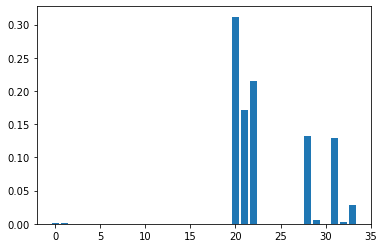

syn: DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=0.005)
Feature: pat_geslacht_code Score: 0.00000
Feature: tum_differentiatiegraad_code Score: 0.00000
Feature: subloc_0 Score: 0.00000
Feature: subloc_2 Score: 0.00000
Feature: subloc_3 Score: 0.00000
Feature: subloc_4 Score: 0.00000
Feature: subloc_5 Score: 0.00000
Feature: subloc_6 Score: 0.00000
Feature: subloc_7 Score: 0.00000
Feature: subloc_8 Score: 0.00000
Feature: subloc_9 Score: 0.00000
Feature: stage_1 Score: 0.00000
Feature: stage_2 Score: 0.00000
Feature: stage_2A Score: 0.00000
Feature: stage_2B Score: 0.00000
Feature: stage_2C Score: 0.00000
Feature: stage_3 Score: 0.00000
Feature: stage_3A Score: 0.00000
Feature: stage_3B Score: 0.00000
Feature: stage_3C Score: 0.00000
Feature: stage_4 Score: 0.00000
Feature: stage_4A Score: 0.00000
Feature: stage_4B Score: 0.00000
Feature: stage_4C Score: 0.00000
Feature: stage_M Score: 0.00000
Feature: stage_X Score: 0.00000
Feature: diagnosis_age_0-20 Score

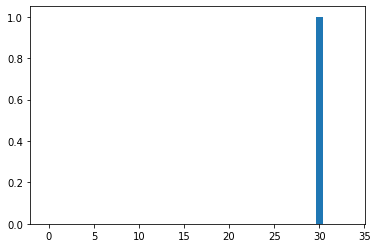

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

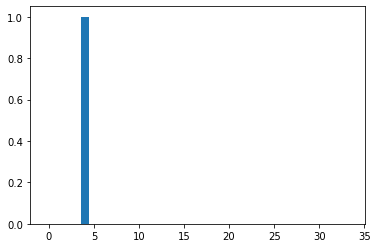

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 1.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

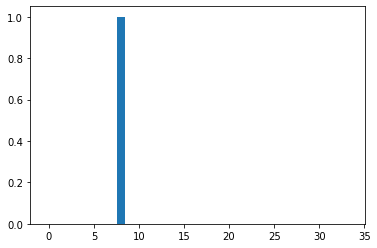

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.9995165344391704
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differen

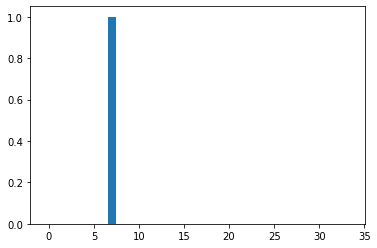

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 1.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

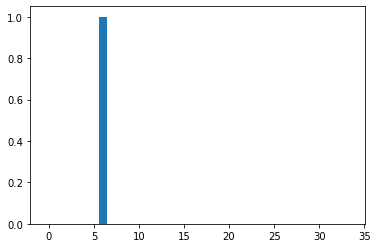

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 1.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

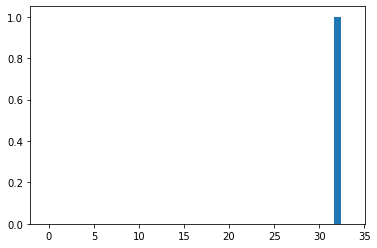

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

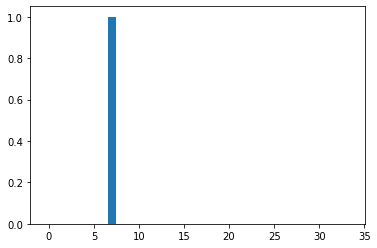

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 1.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

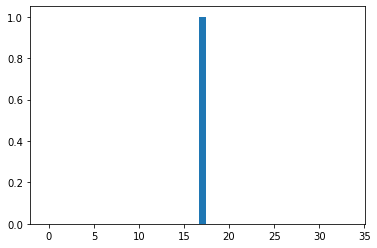

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

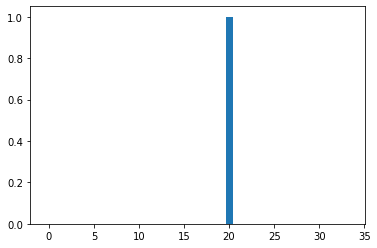

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

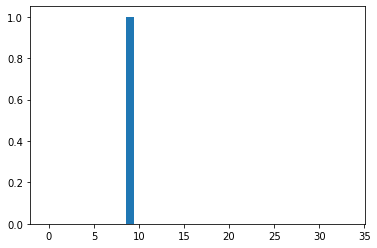

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 1.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

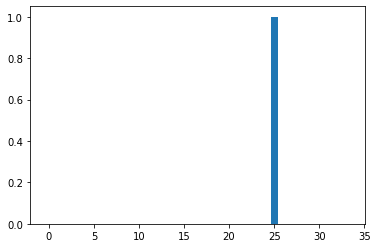

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

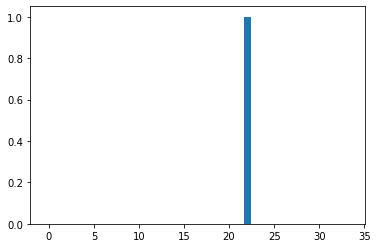

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

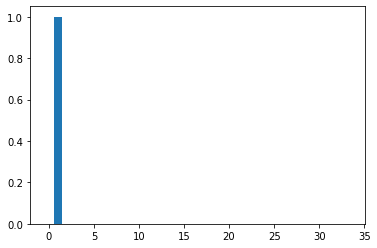

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.9986164960859263
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differen

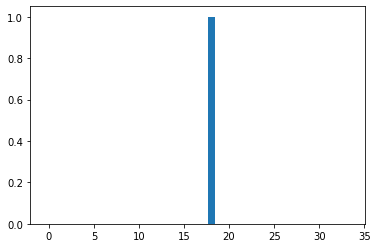

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

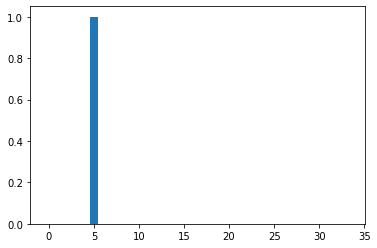

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 1.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

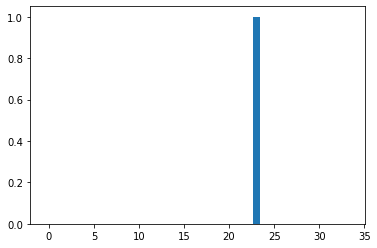

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

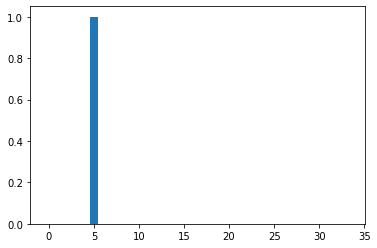

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 1.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

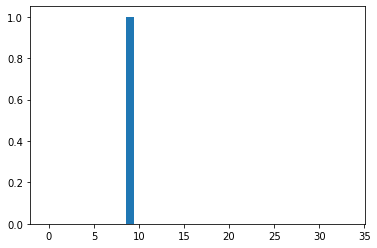

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 1.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

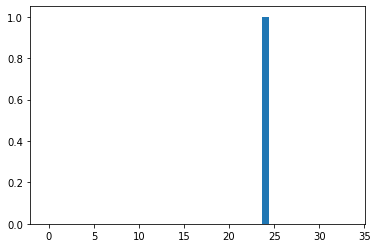

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

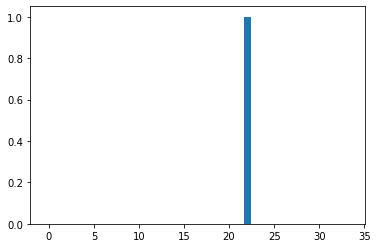

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

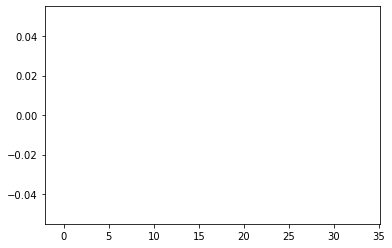

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

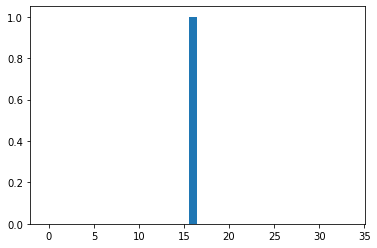

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

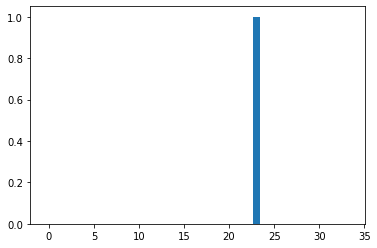

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

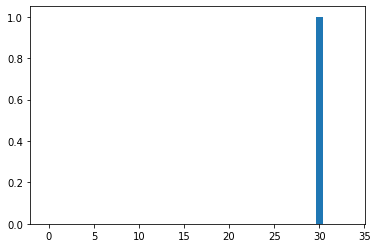

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

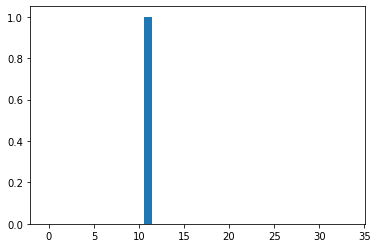

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 1.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

In [13]:
# Do for one DP algorithm at a time for normalized coefficients
privacy_levels = ms_privacy_levels

norm_ms_FID_ORI, norm_ms_FID, norm_ms_FID_ERRORS = NormalizedFIDmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
ori: LogisticRegression(C=1, max_iter=4000)
accuracy of original model is 0.7525734181047532
Feature: pat_geslacht_code Score: 0.11914
Feature: tum_differentiatiegraad_code Score: 0.09979
Feature: subloc_0 Score: 0.00761
Feature: subloc_2 Score: 0.03713
Feature: subloc_3 Score: 0.02073
Feature: subloc_4 Score: 0.01879
Feature: subloc_5 Score: 0.01680
Feature: subloc_6 Score: 0.00727
Feature: subloc_7 Score: 0.09399
Feature: subloc_8 Score: 0.01110
Feature: subloc_9 Score: 0.03376
Feature: stage_1 Score: 0.79550
Feature: stage_2 Score: 0.46909
Feature: stage_2A Score: 0.73205
Feature: stage_2B Score: 0.17046
Feature: stage_2C Score: 0.06639
Feature: stage_3 Score: 0.19980
Feature: stage_3A Score: 0.19796
Feature: stage_3B Score: 0.34043
Feature: stage_3C Score: 0.04847
Feature: stage_4 Score: 0.56547
Feature: stage_4A Score: 0.33246
Feature: stage_4B Score: 0.64325
Featu

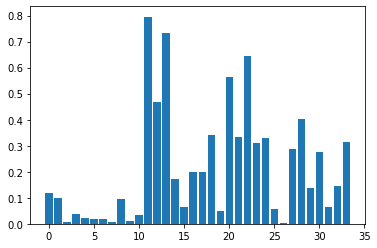

Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=1, max_iter=4000)
Feature: pat_geslacht_code Score: 0.09708
Feature: tum_differentiatiegraad_code Score: 0.05057
Feature: subloc_0 Score: 0.04162
Feature: subloc_2 Score: 0.00756
Feature: subloc_3 Score: 0.02332
Feature: subloc_4 Score: 0.03775
Feature: subloc_5 Score: 0.01237
Feature: subloc_6 Score: 0.01841
Feature: subloc_7 Score: 0.04473
Feature: subloc_8 Score: 0.01905
Feature: subloc_9 Score: 0.00581
Feature: stage_1 Score: 0.54181
Feature: stage_2 Score: 0.27839
Feature: stage_2A Score: 0.44806
Feature: stage_2B Score: 0.06952
Feature: stage_2C Score: 0.03334
Feature: stage_3 Score: 0.09593
Feature: stage_3A Score: 0.14540
Feature: stage_3B Score: 0.19896
Feature: stage_3C Score: 0.01948
Feature: stage_4 Score: 0.60373
Feature: stage_4A Score: 0.34241
Feature: stage_4B Score: 0.49258
Feature: stage_4C Score: 0.03510
Feature: stage_M Score: 0.14114
Feature: stage_X Score: 0

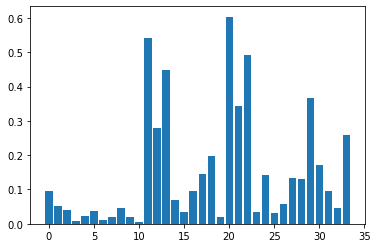

Attribute pat_geslacht_code has squared feature importance difference 8.121776999473447e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.3294200907624814e-05
Attribute subloc_0 has squared feature importance difference 5.086750428908648e-05
Attribute subloc_2 has squared feature importance difference 1.2706821224065425e-05
Attribute subloc_3 has squared feature importance difference 3.0913830406476224e-06
Attribute subloc_4 has squared feature importance difference 2.3553040619395888e-05
Attribute subloc_5 has squared feature importance difference 2.0303407881974533e-08
Attribute subloc_6 has squared feature importance difference 6.890349727671074e-06
Attribute subloc_7 has squared feature importance difference 1.6017636871777787e-05
Attribute subloc_8 has squared feature importance difference 4.963858191007228e-06
Attribute subloc_9 has squared feature importance difference 1.1902628844924111e-05
Attribute stage_1 has squared feature importance di

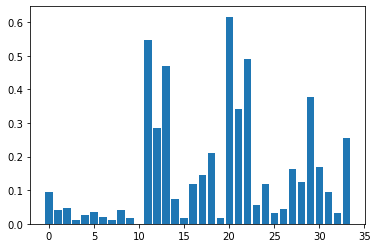

Attribute pat_geslacht_code has squared feature importance difference 5.149062948205848e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 3.1696526943307344e-05
Attribute subloc_0 has squared feature importance difference 6.904658270379148e-05
Attribute subloc_2 has squared feature importance difference 8.812691617071706e-06
Attribute subloc_3 has squared feature importance difference 5.455491714398626e-06
Attribute subloc_4 has squared feature importance difference 1.7545192609113648e-05
Attribute subloc_5 has squared feature importance difference 2.281936124791805e-06
Attribute subloc_6 has squared feature importance difference 2.117023138148185e-06
Attribute subloc_7 has squared feature importance difference 2.0842622113492196e-05
Attribute subloc_8 has squared feature importance difference 3.1336579539017204e-06
Attribute subloc_9 has squared feature importance difference 2.0920487396179202e-05
Attribute stage_1 has squared feature importance diff

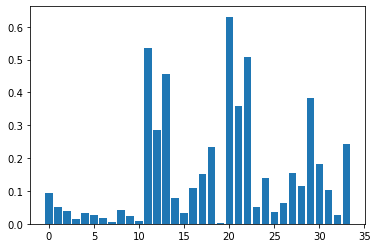

Attribute pat_geslacht_code has squared feature importance difference 2.1467010600577166e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.5865917159354853e-05
Attribute subloc_0 has squared feature importance difference 4.442464609380835e-05
Attribute subloc_2 has squared feature importance difference 4.183051622070249e-06
Attribute subloc_3 has squared feature importance difference 1.2049101454420197e-05
Attribute subloc_4 has squared feature importance difference 7.525508338166625e-06
Attribute subloc_5 has squared feature importance difference 1.3881197774654803e-06
Attribute subloc_6 has squared feature importance difference 3.9964307512208706e-08
Attribute subloc_7 has squared feature importance difference 2.419097924762845e-05
Attribute subloc_8 has squared feature importance difference 9.850988058811378e-06
Attribute subloc_9 has squared feature importance difference 8.143417825475648e-06
Attribute stage_1 has squared feature importance diff

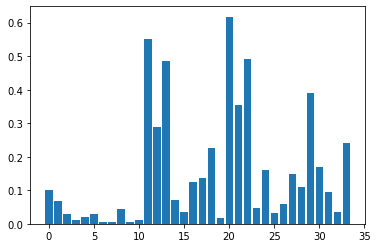

Attribute pat_geslacht_code has squared feature importance difference 1.0893103922267858e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 3.721890870637217e-07
Attribute subloc_0 has squared feature importance difference 2.2823852627461654e-05
Attribute subloc_2 has squared feature importance difference 8.765213042881271e-06
Attribute subloc_3 has squared feature importance difference 1.7535895964572265e-06
Attribute subloc_4 has squared feature importance difference 9.404223823922038e-06
Attribute subloc_5 has squared feature importance difference 1.208581846343639e-06
Attribute subloc_6 has squared feature importance difference 4.476293546108573e-08
Attribute subloc_7 has squared feature importance difference 2.1223461271013295e-05
Attribute subloc_8 has squared feature importance difference 7.997570684374185e-08
Attribute subloc_9 has squared feature importance difference 5.6997408680334615e-06
Attribute stage_1 has squared feature importance diff

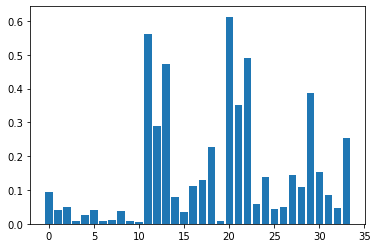

Attribute pat_geslacht_code has squared feature importance difference 2.8940149711547427e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 3.4194074332353015e-05
Attribute subloc_0 has squared feature importance difference 7.616401010105135e-05
Attribute subloc_2 has squared feature importance difference 1.196123575154995e-05
Attribute subloc_3 has squared feature importance difference 4.026476586973859e-06
Attribute subloc_4 has squared feature importance difference 2.770026059214567e-05
Attribute subloc_5 has squared feature importance difference 5.638658580758659e-07
Attribute subloc_6 has squared feature importance difference 1.5500947677239489e-06
Attribute subloc_7 has squared feature importance difference 3.226714562714734e-05
Attribute subloc_8 has squared feature importance difference 1.0985570302537111e-07
Attribute subloc_9 has squared feature importance difference 1.4056144543502371e-05
Attribute stage_1 has squared feature importance diff

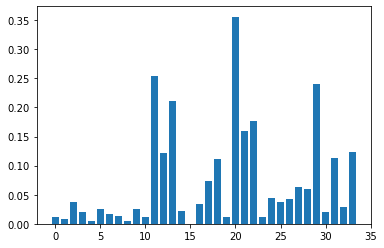

Attribute pat_geslacht_code has squared feature importance difference 0.00013507441989578215
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.000104623514132968
Attribute subloc_0 has squared feature importance difference 0.0001997603792379659
Attribute subloc_2 has squared feature importance difference 1.1603315238893082e-05
Attribute subloc_3 has squared feature importance difference 6.886676564999185e-07
Attribute subloc_4 has squared feature importance difference 6.136014250721563e-05
Attribute subloc_5 has squared feature importance difference 1.9666799300495482e-05
Attribute subloc_6 has squared feature importance difference 1.9432795053059473e-05
Attribute subloc_7 has squared feature importance difference 0.00012454876514837629
Attribute subloc_8 has squared feature importance difference 7.415740878747458e-05
Attribute subloc_9 has squared feature importance difference 2.514326872895847e-09
Attribute stage_1 has squared feature importance diffe

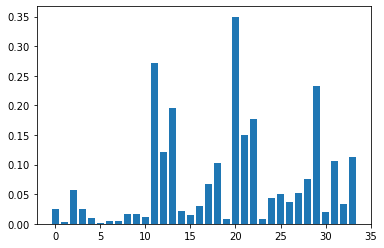

Attribute pat_geslacht_code has squared feature importance difference 3.632070328950498e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0001442516330789217
Attribute subloc_0 has squared feature importance difference 0.00048688561946412897
Attribute subloc_2 has squared feature importance difference 2.447815623903945e-05
Attribute subloc_3 has squared feature importance difference 1.1863238723633508e-06
Attribute subloc_4 has squared feature importance difference 2.9713243175813893e-06
Attribute subloc_5 has squared feature importance difference 8.536179987000582e-08
Attribute subloc_6 has squared feature importance difference 1.1581021613842007e-06
Attribute subloc_7 has squared feature importance difference 3.68963893725318e-05
Attribute subloc_8 has squared feature importance difference 2.441666184298136e-05
Attribute subloc_9 has squared feature importance difference 1.8161154625663295e-09
Attribute stage_1 has squared feature importance diffe

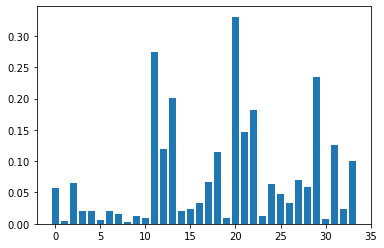

Attribute pat_geslacht_code has squared feature importance difference 3.9523587603826674e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00014489719453488704
Attribute subloc_0 has squared feature importance difference 0.0005970274472735695
Attribute subloc_2 has squared feature importance difference 9.696253892791638e-06
Attribute subloc_3 has squared feature importance difference 3.063256635784373e-05
Attribute subloc_4 has squared feature importance difference 4.182686610860449e-08
Attribute subloc_5 has squared feature importance difference 3.2422982973678354e-05
Attribute subloc_6 has squared feature importance difference 2.5207759989489148e-05
Attribute subloc_7 has squared feature importance difference 0.00013639747083436706
Attribute subloc_8 has squared feature importance difference 1.051992582848634e-05
Attribute subloc_9 has squared feature importance difference 5.865283006190946e-07
Attribute stage_1 has squared feature importance diff

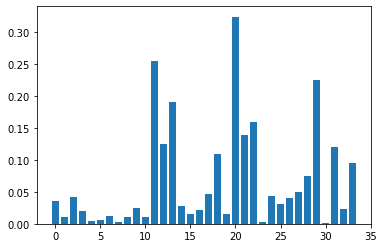

Attribute pat_geslacht_code has squared feature importance difference 6.047873198132172e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.165024562176454e-05
Attribute subloc_0 has squared feature importance difference 0.00030213012768098277
Attribute subloc_2 has squared feature importance difference 1.2541114385703831e-05
Attribute subloc_3 has squared feature importance difference 1.3855372849439103e-06
Attribute subloc_4 has squared feature importance difference 3.837910143505096e-08
Attribute subloc_5 has squared feature importance difference 8.587055163813224e-06
Attribute subloc_6 has squared feature importance difference 2.7323306590297007e-08
Attribute subloc_7 has squared feature importance difference 6.60384123977178e-05
Attribute subloc_8 has squared feature importance difference 8.812044854479903e-05
Attribute subloc_9 has squared feature importance difference 5.853934603999695e-08
Attribute stage_1 has squared feature importance differ

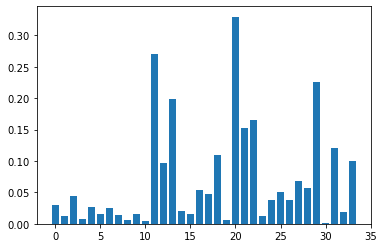

Attribute pat_geslacht_code has squared feature importance difference 1.3399458150981598e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.78205295919621e-05
Attribute subloc_0 has squared feature importance difference 0.0003049486034415034
Attribute subloc_2 has squared feature importance difference 3.308457891231852e-06
Attribute subloc_3 has squared feature importance difference 6.591369021449879e-05
Attribute subloc_4 has squared feature importance difference 1.7591334140457248e-05
Attribute subloc_5 has squared feature importance difference 7.046968761703562e-05
Attribute subloc_6 has squared feature importance difference 2.350614846625952e-05
Attribute subloc_7 has squared feature importance difference 0.00010591672409688004
Attribute subloc_8 has squared feature importance difference 2.830817812753997e-05
Attribute subloc_9 has squared feature importance difference 9.036013127446964e-06
Attribute stage_1 has squared feature importance differe

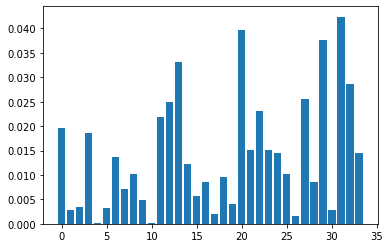

Attribute pat_geslacht_code has squared feature importance difference 0.0005893690324421338
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.250953921797033e-05
Attribute subloc_0 has squared feature importance difference 3.591289873600526e-05
Attribute subloc_2 has squared feature importance difference 0.0011171776026347297
Attribute subloc_3 has squared feature importance difference 6.717829745133015e-06
Attribute subloc_4 has squared feature importance difference 1.5432235026108e-05
Attribute subloc_5 has squared feature importance difference 0.000670040834514675
Attribute subloc_6 has squared feature importance difference 0.00019139481500844268
Attribute subloc_7 has squared feature importance difference 6.515236676174763e-05
Attribute subloc_8 has squared feature importance difference 7.316767589660965e-05
Attribute subloc_9 has squared feature importance difference 1.8682189683920153e-05
Attribute stage_1 has squared feature importance difference

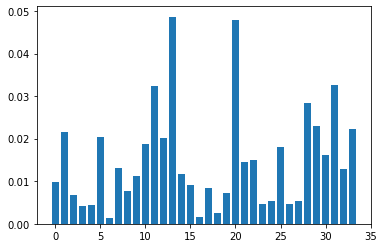

Attribute pat_geslacht_code has squared feature importance difference 9.058359748589991e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0008052268795454083
Attribute subloc_0 has squared feature importance difference 0.0001465457489513115
Attribute subloc_2 has squared feature importance difference 9.614277514191263e-06
Attribute subloc_3 has squared feature importance difference 3.214182939519523e-05
Attribute subloc_4 has squared feature importance difference 0.0013984385301367868
Attribute subloc_5 has squared feature importance difference 8.18549108001721e-08
Attribute subloc_6 has squared feature importance difference 0.0006010702567713541
Attribute subloc_7 has squared feature importance difference 5.644280784607841e-06
Attribute subloc_8 has squared feature importance difference 0.00041323343734733385
Attribute subloc_9 has squared feature importance difference 0.0010348778431161943
Attribute stage_1 has squared feature importance differenc

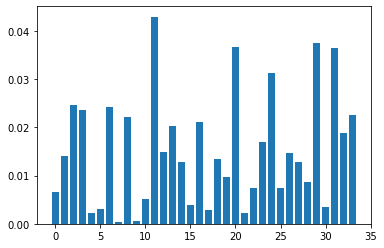

Attribute pat_geslacht_code has squared feature importance difference 1.4108303054345991e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00017747365578567377
Attribute subloc_0 has squared feature importance difference 0.0021126426872804093
Attribute subloc_2 has squared feature importance difference 0.0015898827949390047
Attribute subloc_3 has squared feature importance difference 1.6933654438590914e-06
Attribute subloc_4 has squared feature importance difference 1.1835393732163283e-05
Attribute subloc_5 has squared feature importance difference 0.0019225916808418095
Attribute subloc_6 has squared feature importance difference 2.8275634720714792e-08
Attribute subloc_7 has squared feature importance difference 0.0008587183659008511
Attribute subloc_8 has squared feature importance difference 6.858729370734233e-08
Attribute subloc_9 has squared feature importance difference 2.8807471891819e-05
Attribute stage_1 has squared feature importance differ

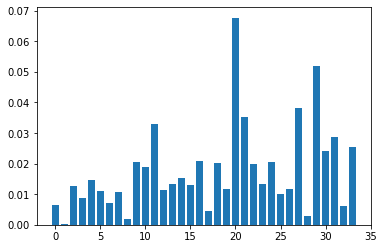

Attribute pat_geslacht_code has squared feature importance difference 3.0244691361542228e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00017108510486663875
Attribute subloc_0 has squared feature importance difference 0.00039610557062197524
Attribute subloc_2 has squared feature importance difference 8.488644140555612e-05
Attribute subloc_3 has squared feature importance difference 0.00043855535628910876
Attribute subloc_4 has squared feature importance difference 0.00023794246684547097
Attribute subloc_5 has squared feature importance difference 8.714451786399567e-05
Attribute subloc_6 has squared feature importance difference 0.0002725931148804867
Attribute subloc_7 has squared feature importance difference 8.966788180418145e-05
Attribute subloc_8 has squared feature importance difference 0.0010111540235919888
Attribute subloc_9 has squared feature importance difference 0.0007003908620123136
Attribute stage_1 has squared feature importance diff

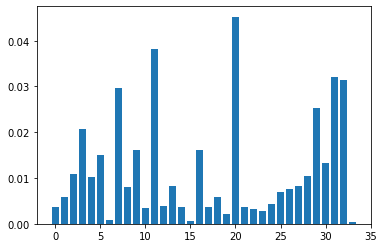

Attribute pat_geslacht_code has squared feature importance difference 4.680050494669547e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 7.295929976103645e-07
Attribute subloc_0 has squared feature importance difference 0.0006738803313459037
Attribute subloc_2 has squared feature importance difference 0.0021559343466672075
Attribute subloc_3 has squared feature importance difference 0.0005131425791069351
Attribute subloc_4 has squared feature importance difference 0.0012306796832098877
Attribute subloc_5 has squared feature importance difference 1.9880441197572766e-07
Attribute subloc_6 has squared feature importance difference 0.005278584133212769
Attribute subloc_7 has squared feature importance difference 5.4090839744226655e-05
Attribute subloc_8 has squared feature importance difference 0.001486138364673401
Attribute subloc_9 has squared feature importance difference 1.6050297258254904e-05
Attribute stage_1 has squared feature importance differen

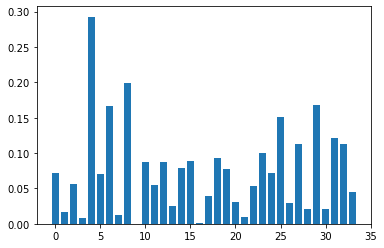

Attribute pat_geslacht_code has squared feature importance difference 0.00013432407922336033
Attribute tum_differentiatiegraad_code has squared feature importance difference 5.207334786112185e-05
Attribute subloc_0 has squared feature importance difference 0.0004414016683574598
Attribute subloc_2 has squared feature importance difference 2.7466014868838626e-06
Attribute subloc_3 has squared feature importance difference 0.012310182770646792
Attribute subloc_4 has squared feature importance difference 0.0006192646555375045
Attribute subloc_5 has squared feature importance difference 0.003908197544521539
Attribute subloc_6 has squared feature importance difference 1.505628788937712e-05
Attribute subloc_7 has squared feature importance difference 0.004143149866979321
Attribute subloc_8 has squared feature importance difference 1.8913061964526227e-06
Attribute subloc_9 has squared feature importance difference 0.0008519654589732621
Attribute stage_1 has squared feature importance differenc

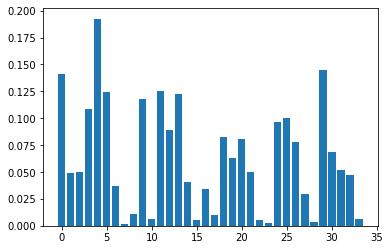

Attribute pat_geslacht_code has squared feature importance difference 0.002349289763016705
Attribute tum_differentiatiegraad_code has squared feature importance difference 7.838714024521427e-05
Attribute subloc_0 has squared feature importance difference 0.0004886177972168557
Attribute subloc_2 has squared feature importance difference 0.002024008210586639
Attribute subloc_3 has squared feature importance difference 0.007321203662160863
Attribute subloc_4 has squared feature importance difference 0.002981859215651588
Attribute subloc_5 has squared feature importance difference 0.00021913170165221147
Attribute subloc_6 has squared feature importance difference 4.5171182007654564e-08
Attribute subloc_7 has squared feature importance difference 6.16843913653808e-05
Attribute subloc_8 has squared feature importance difference 0.0027465331345033137
Attribute subloc_9 has squared feature importance difference 2.6067146867158962e-06
Attribute stage_1 has squared feature importance difference 

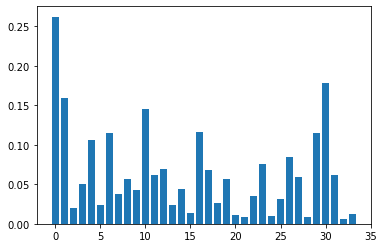

Attribute pat_geslacht_code has squared feature importance difference 0.010661462797459878
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0034847430707422087
Attribute subloc_0 has squared feature importance difference 6.167321354524242e-05
Attribute subloc_2 has squared feature importance difference 0.0003156690047836456
Attribute subloc_3 has squared feature importance difference 0.002052035196632636
Attribute subloc_4 has squared feature importance difference 6.718263436861263e-05
Attribute subloc_5 has squared feature importance difference 0.0025014988843627883
Attribute subloc_6 has squared feature importance difference 0.00027043111043388145
Attribute subloc_7 has squared feature importance difference 0.00017803907225507544
Attribute subloc_8 has squared feature importance difference 0.00031399493965569473
Attribute subloc_9 has squared feature importance difference 0.0038330473284792456
Attribute stage_1 has squared feature importance differen

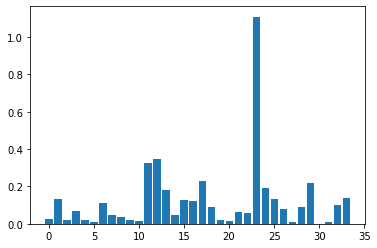

Attribute pat_geslacht_code has squared feature importance difference 0.00010301065765967499
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00030330499014478616
Attribute subloc_0 has squared feature importance difference 1.0710059254110154e-05
Attribute subloc_2 has squared feature importance difference 0.00011902403647176283
Attribute subloc_3 has squared feature importance difference 6.890435978749988e-06
Attribute subloc_4 has squared feature importance difference 3.940218124610238e-07
Attribute subloc_5 has squared feature importance difference 0.0005715530877005944
Attribute subloc_6 has squared feature importance difference 9.982730094671471e-05
Attribute subloc_7 has squared feature importance difference 2.184018261561139e-05
Attribute subloc_8 has squared feature importance difference 1.1327344038624995e-05
Attribute subloc_9 has squared feature importance difference 4.602816424184565e-07
Attribute stage_1 has squared feature importance diff

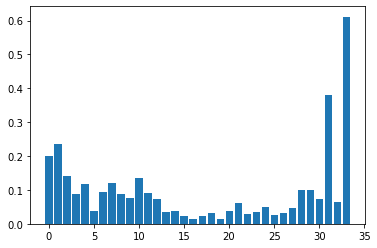

Attribute pat_geslacht_code has squared feature importance difference 0.0019025597550873209
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0032394248336051713
Attribute subloc_0 has squared feature importance difference 0.0016942715304587774
Attribute subloc_2 has squared feature importance difference 0.0004465517209642796
Attribute subloc_3 has squared feature importance difference 0.0010660113013005643
Attribute subloc_4 has squared feature importance difference 7.517609749695399e-05
Attribute subloc_5 has squared feature importance difference 0.0006703676335127747
Attribute subloc_6 has squared feature importance difference 0.0012119252651506133
Attribute subloc_7 has squared feature importance difference 0.0001968266854036618
Attribute subloc_8 has squared feature importance difference 0.0004633190380694324
Attribute subloc_9 has squared feature importance difference 0.0013300492879347373
Attribute stage_1 has squared feature importance differenc

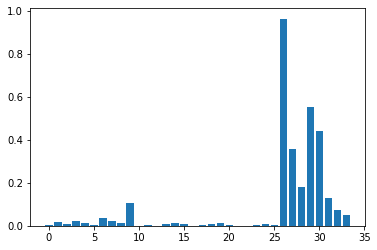

Attribute pat_geslacht_code has squared feature importance difference 0.0002431820022399908
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.984040792910085e-05
Attribute subloc_0 has squared feature importance difference 3.5754975759613207e-06
Attribute subloc_2 has squared feature importance difference 4.907921068972037e-06
Attribute subloc_3 has squared feature importance difference 2.4321924072226196e-06
Attribute subloc_4 has squared feature importance difference 3.0632077276752694e-06
Attribute subloc_5 has squared feature importance difference 8.667857231441657e-05
Attribute subloc_6 has squared feature importance difference 4.4186727448865475e-05
Attribute subloc_7 has squared feature importance difference 8.568228162843184e-05
Attribute subloc_8 has squared feature importance difference 0.001050374901705615
Attribute subloc_9 has squared feature importance difference 1.7339055757104213e-05
Attribute stage_1 has squared feature importance diffe

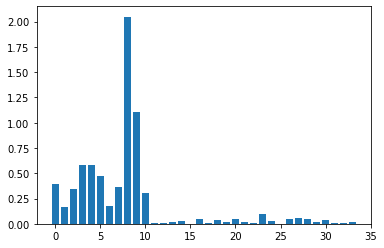

Attribute pat_geslacht_code has squared feature importance difference 0.0015293326238329864
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.370136793992671e-05
Attribute subloc_0 has squared feature importance difference 0.0021760459304466843
Attribute subloc_2 has squared feature importance difference 0.005819196253076198
Attribute subloc_3 has squared feature importance difference 0.006255350623022154
Attribute subloc_4 has squared feature importance difference 0.004062759501332538
Attribute subloc_5 has squared feature importance difference 0.0004848740874916545
Attribute subloc_6 has squared feature importance difference 0.002483665050698361
Attribute subloc_7 has squared feature importance difference 0.075056886582276
Attribute subloc_8 has squared feature importance difference 0.023685403645321207
Attribute subloc_9 has squared feature importance difference 0.0014010093347005745
Attribute stage_1 has squared feature importance difference 0.01150

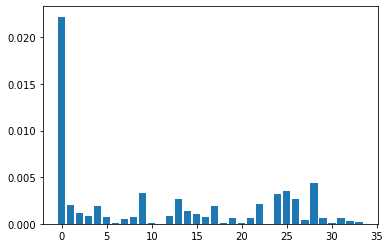

Attribute pat_geslacht_code has squared feature importance difference 0.11881710939484294
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.000344796925499074
Attribute subloc_0 has squared feature importance difference 0.00030809029693653467
Attribute subloc_2 has squared feature importance difference 6.033076926631253e-05
Attribute subloc_3 has squared feature importance difference 0.0008100264975832725
Attribute subloc_4 has squared feature importance difference 8.288847911280917e-05
Attribute subloc_5 has squared feature importance difference 1.3407637530447317e-06
Attribute subloc_6 has squared feature importance difference 5.040201745243819e-05
Attribute subloc_7 has squared feature importance difference 8.055077158041844e-07
Attribute subloc_8 has squared feature importance difference 0.0028095783970184386
Attribute subloc_9 has squared feature importance difference 1.4932051679217094e-05
Attribute stage_1 has squared feature importance differenc

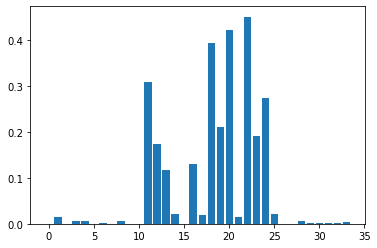

Attribute pat_geslacht_code has squared feature importance difference 0.00026243682958355
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.77272781968156e-05
Attribute subloc_0 has squared feature importance difference 1.0694818302374285e-06
Attribute subloc_2 has squared feature importance difference 1.0026087165819618e-05
Attribute subloc_3 has squared feature importance difference 3.558496449821942e-07
Attribute subloc_4 has squared feature importance difference 6.52574214737124e-06
Attribute subloc_5 has squared feature importance difference 3.4319289454614326e-06
Attribute subloc_6 has squared feature importance difference 9.763222246623935e-07
Attribute subloc_7 has squared feature importance difference 0.0001197224480344108
Attribute subloc_8 has squared feature importance difference 2.279901796008639e-06
Attribute subloc_9 has squared feature importance difference 2.1066786274170048e-05
Attribute stage_1 has squared feature importance differenc

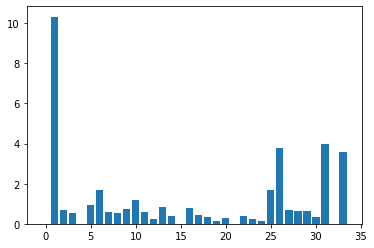

Attribute pat_geslacht_code has squared feature importance difference 0.00025321356151473994
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.06890311632887501
Attribute subloc_0 has squared feature importance difference 0.0002793907101259244
Attribute subloc_2 has squared feature importance difference 9.798995269452086e-05
Attribute subloc_3 has squared feature importance difference 6.71719289028089e-06
Attribute subloc_4 has squared feature importance difference 0.000492276389941779
Attribute subloc_5 has squared feature importance difference 0.0018227830715898496
Attribute subloc_6 has squared feature importance difference 0.00021945370895690543
Attribute subloc_7 has squared feature importance difference 3.1449565086173546e-06
Attribute subloc_8 has squared feature importance difference 0.00034822097068726423
Attribute subloc_9 has squared feature importance difference 0.0007357291277627345
Attribute stage_1 has squared feature importance differenc

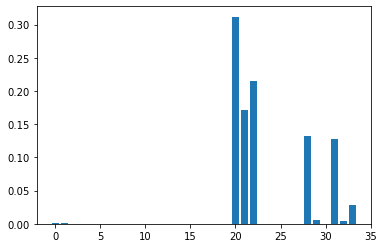

syn: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
Feature: pat_geslacht_code Score: 0.00000
Feature: tum_differentiatiegraad_code Score: 0.00000
Feature: subloc_0 Score: 0.00135
Feature: subloc_2 Score: 0.00000
Feature: subloc_3 Score: 0.00000
Feature: subloc_4 Score: 0.00000
Feature: subloc_5 Score: 0.00000
Feature: subloc_6 Score: 0.00000
Feature: subloc_7 Score: 0.00033
Feature: subloc_8 Score: 0.00000
Feature: subloc_9 Score: 0.00000
Feature: stage_1 Score: 0.00000
Feature: stage_2 Score: 0.00000
Feature: stage_2A Score: 0.00000
Feature: stage_2B Score: 0.00000
Feature: stage_2C Score: 0.00000
Feature: stage_3 Score: 0.00000
Feature: stage_3A Score: 0.00000
Feature: stage_3B Score: 0.00000
Feature: stage_3C Score: 0.00000
Feature: stage_4 Score: 0.30835
Feature: stage_4A Score: 0.16379
Feature: stage_4B Score: 0.19143
Feature: stage_4C Score: 0.00000
Feature: stage_M Score: 0.00000
Feature: stage_X Score: 0.00000
Feature: diagnosis_age_0-20 Score

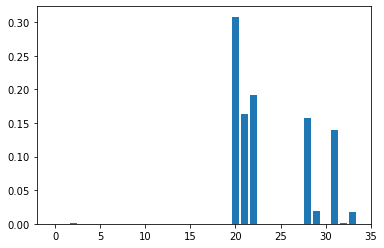

Attribute pat_geslacht_code has squared feature importance difference 3.9216829522689377e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 1.3040380874616318e-06
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 7.419582702050977e-09
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diff

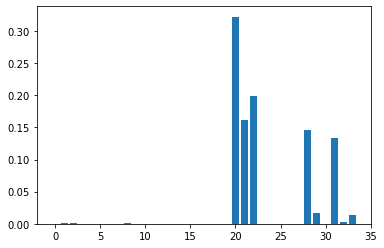

Attribute pat_geslacht_code has squared feature importance difference 1.9857898229339758e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.6835454536013342e-06
Attribute subloc_0 has squared feature importance difference 1.0663188073593273e-06
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 7.757703324683213e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance dif

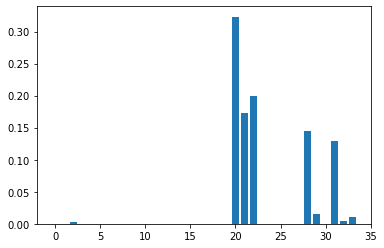

Attribute pat_geslacht_code has squared feature importance difference 1.3772344308489656e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 2.3718327199927673e-07
Attribute subloc_0 has squared feature importance difference 3.8103044739703764e-06
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance dif

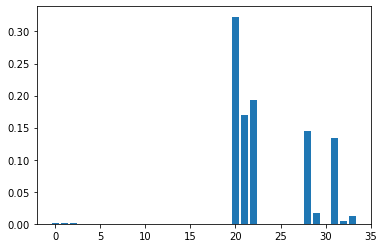

Attribute pat_geslacht_code has squared feature importance difference 8.10235415537577e-09
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.782912016780039e-09
Attribute subloc_0 has squared feature importance difference 2.5250503693983835e-07
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

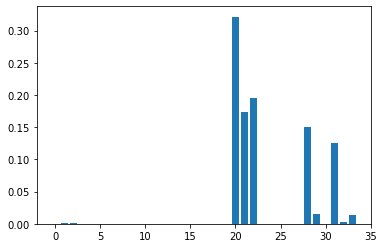

Attribute pat_geslacht_code has squared feature importance difference 2.012944279729102e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 3.371662247080583e-10
Attribute subloc_0 has squared feature importance difference 1.192556235958923e-07
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 3.5242863829924856e-09
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

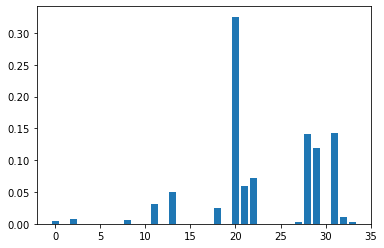

Attribute pat_geslacht_code has squared feature importance difference 1.369353780496419e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 6.273346525459949e-05
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 2.89045000039648e-05
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.000975450221482064
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature i

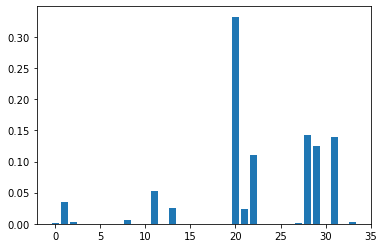

Attribute pat_geslacht_code has squared feature importance difference 3.4786173997190994e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.001125461853007174
Attribute subloc_0 has squared feature importance difference 9.271320748180147e-06
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 3.300063238904611e-05
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0027980311857964775
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature

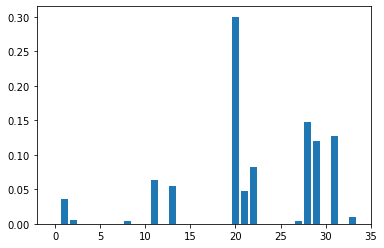

Attribute pat_geslacht_code has squared feature importance difference 8.745653618517972e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0012442807863694704
Attribute subloc_0 has squared feature importance difference 2.236750917453742e-05
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 1.4683122948513422e-05
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.003939151072942778
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature

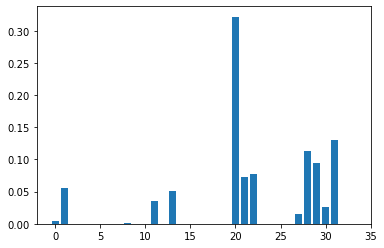

Attribute pat_geslacht_code has squared feature importance difference 1.2381916483883608e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0029722793684152974
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 6.969884365040811e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0012826722717387137
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared featur

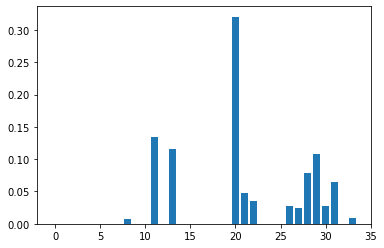

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.3193024920192155e-05
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0180677627460575
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature 

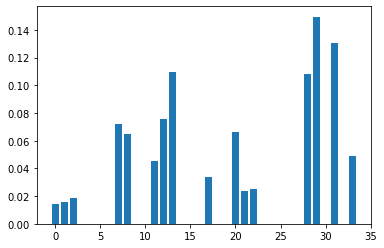

Attribute pat_geslacht_code has squared feature importance difference 0.0001780579314324391
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00021614216703585697
Attribute subloc_0 has squared feature importance difference 0.0003260623152819446
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.005214865285605462
Attribute subloc_7 has squared feature importance difference 0.004193019431154171
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0020291694821861447
Attribute stage_2 has squared feature importance difference 0.005676710377198298
Attr

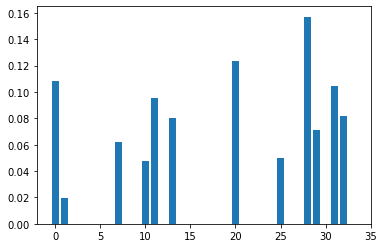

Attribute pat_geslacht_code has squared feature importance difference 0.011636425429193688
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00036683128783387194
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.003819609046619842
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.002232733852561959
Attribute stage_1 has squared feature importance difference 0.009074708026911696
Attribute stage_2 has squared feature importance difference 0.0
Attri

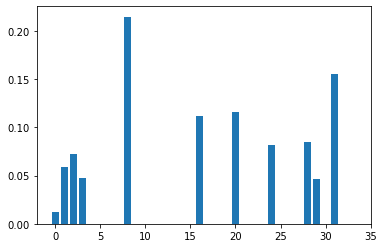

Attribute pat_geslacht_code has squared feature importance difference 0.00012463600601903555
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0033329894816396598
Attribute subloc_0 has squared feature importance difference 0.005173712962901454
Attribute subloc_2 has squared feature importance difference 0.002203014237101256
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.0459072101219329
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature imp

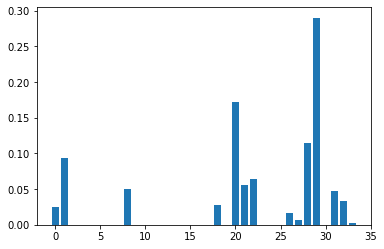

Attribute pat_geslacht_code has squared feature importance difference 0.0005974930690787903
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.008513709968554483
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.0024822185119559733
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differe

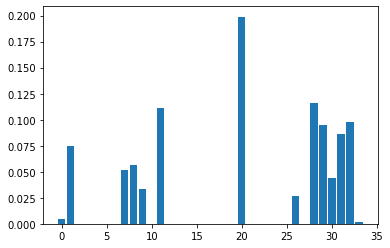

Attribute pat_geslacht_code has squared feature importance difference 1.616997837252708e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.005524676282080081
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0026398269693036934
Attribute subloc_7 has squared feature importance difference 0.003214762477883446
Attribute subloc_8 has squared feature importance difference 0.0011248433046400646
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.012316679398705614
Attribute stage_2 has squared feature importance difference 0.0
Attri

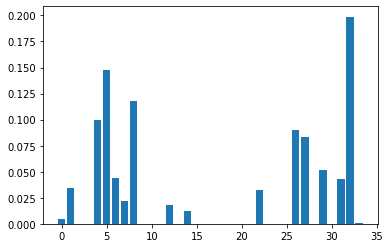

Attribute pat_geslacht_code has squared feature importance difference 1.855423378222786e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0011037654078020081
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.009842374510939287
Attribute subloc_4 has squared feature importance difference 0.021674507106840362
Attribute subloc_5 has squared feature importance difference 0.0019404073414603302
Attribute subloc_6 has squared feature importance difference 0.0004756158199514935
Attribute subloc_7 has squared feature importance difference 0.013778094201313809
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance di

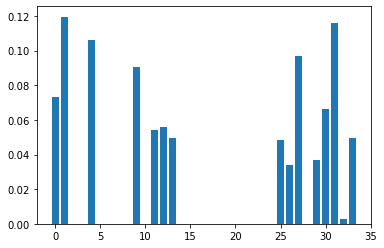

Attribute pat_geslacht_code has squared feature importance difference 0.005277584337357582
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.014139969312074388
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.011294635734981217
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.008200293386801753
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.00293244521816537
Attribute stage_2 has squared feature importance difference 0.0031071626

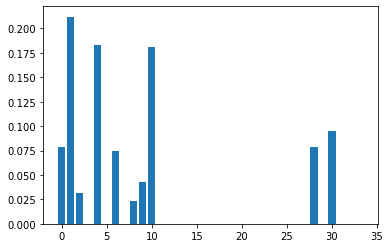

Attribute pat_geslacht_code has squared feature importance difference 0.006017617820205255
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.04465968605082182
Attribute subloc_0 has squared feature importance difference 0.0009726095154261371
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.033484459816400726
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.005558509119915577
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.0005313168551803974
Attribute subloc_8 has squared feature importance difference 0.0018311565810183047
Attribute subloc_9 has squared feature importance difference 0.03260579588990278
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance differ

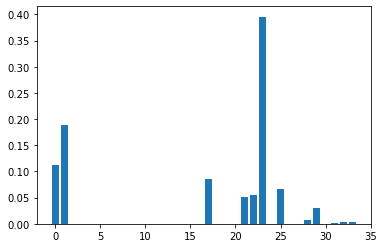

Attribute pat_geslacht_code has squared feature importance difference 0.01235021430559563
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0353390426967906
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 

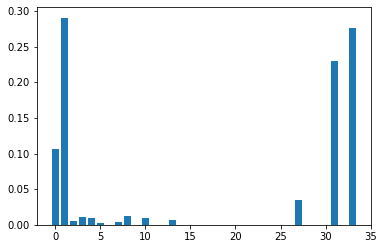

Attribute pat_geslacht_code has squared feature importance difference 0.011327328427877583
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.08418640656986032
Attribute subloc_0 has squared feature importance difference 3.058251487129031e-05
Attribute subloc_2 has squared feature importance difference 0.00011876177505629013
Attribute subloc_3 has squared feature importance difference 9.101671813374309e-05
Attribute subloc_4 has squared feature importance difference 8.944100939407834e-06
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 1.1093044567122032e-05
Attribute subloc_7 has squared feature importance difference 0.0001335029574059967
Attribute subloc_8 has squared feature importance difference 3.56130173861122e-11
Attribute subloc_9 has squared feature importance difference 8.202740954157207e-05
Attribute stage_1 has squared feature importance difference 0.0
Attribute stag

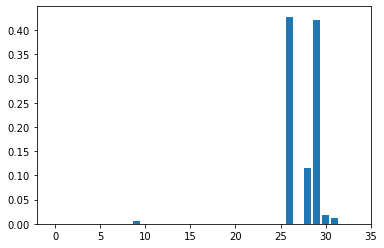

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 4.489123866966687e-05
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 1.063836869923385e-09
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A 

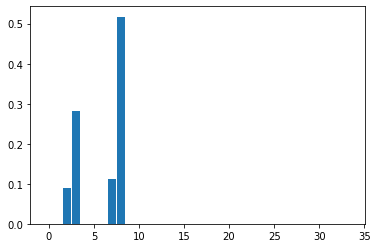

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 0.007902607787351891
Attribute subloc_2 has squared feature importance difference 0.07975726273373547
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.012321128573471733
Attribute subloc_7 has squared feature importance difference 0.26734009836011524
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has sq

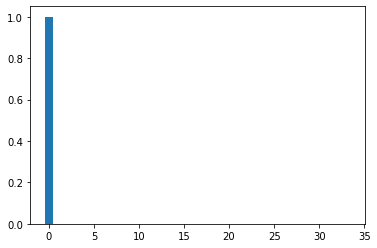

Attribute pat_geslacht_code has squared feature importance difference 0.9987380228348565
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differenc

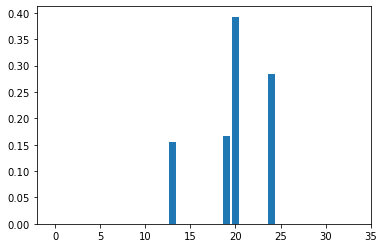

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.788520742486507e-07
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 4.503826903187357e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

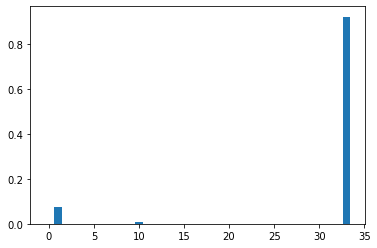

Attribute pat_geslacht_code has squared feature importance difference 3.9839801561529137e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.005278001787512476
Attribute subloc_0 has squared feature importance difference 4.492477609385579e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.844886698824033e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 4.175256269107617e-05
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature

In [14]:
# Do for one DP algorithm at a time for normalized coefficients
privacy_levels = pb_privacy_levels

norm_pb_FID_ORI, norm_pb_FID, norm_pb_FID_ERRORS = NormalizedFIDmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

In [15]:
labels = ['very low', 'low', 'medium', 'high', 'very high']

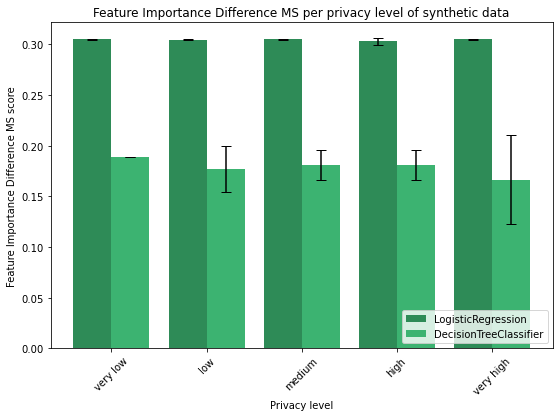

In [16]:
QMbar_one_DP_alg(QM=ms_FID, QMerror = ms_FID_ERRORS, QMname='Feature Importance Difference MS', labels=labels)

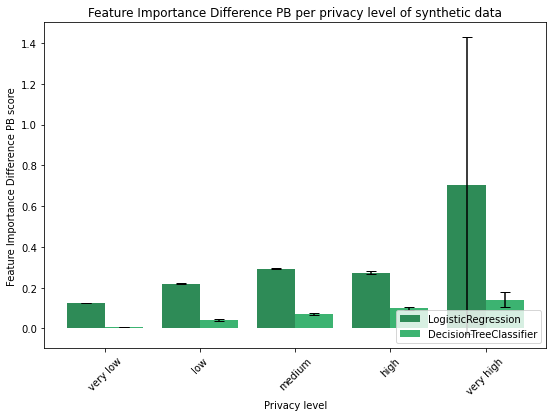

In [17]:
QMbar_one_DP_alg(QM=pb_FID, QMerror = pb_FID_ERRORS, QMname='Feature Importance Difference PB', labels=labels)

# Combined visualization

In [18]:
QM_FID_ori = ms_FID_ORI+pb_FID_ORI
QM_FID = ms_FID+pb_FID
QM_FID_error = ms_FID_ERRORS+pb_FID_ERRORS

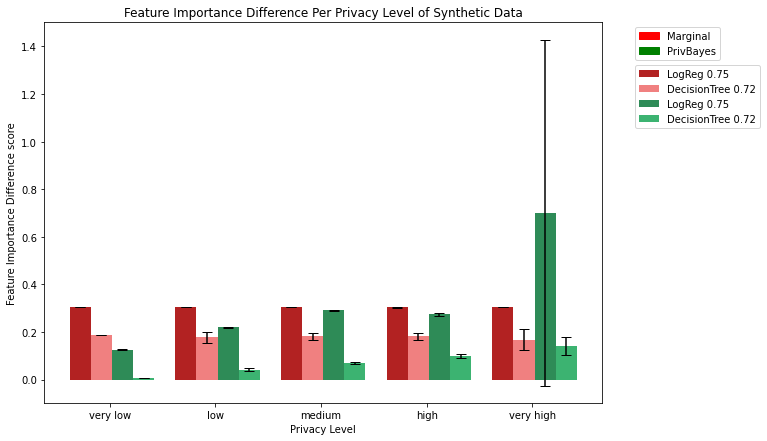

In [19]:
fig = QMbar_two_DP_algs(QM=QM_FID, QMerror = QM_FID_error, QMname='Feature Importance Difference', QMori = QM_FID_ori, labels=labels)
fig.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Final Result Feature Importance Difference-subset_3.png', bbox_inches='tight', dpi=100)

In [20]:
# Normalized combined visualization
norm_QM_FID_ori = norm_ms_FID_ORI+norm_pb_FID_ORI
norm_QM_FID = norm_ms_FID+norm_pb_FID
norm_QM_FID_error = norm_ms_FID_ERRORS+norm_pb_FID_ERRORS

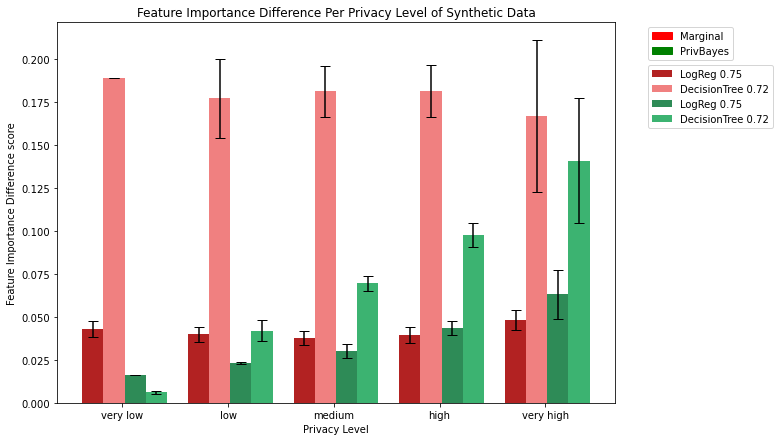

In [21]:
fig = QMbar_two_DP_algs(QM=norm_QM_FID, QMerror = norm_QM_FID_error, QMname='Feature Importance Difference', QMori = norm_QM_FID_ori, labels=labels)
fig.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Final Result Normalized Feature Importance Difference-subset_3.png', bbox_inches='tight', dpi=100)